# 1. Importing Packages

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
import random

from sklearn.linear_model import LinearRegression
from sklearn import metrics


from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
rcParams["figure.figsize"] = 12, 8



# 2. Reading the Data

In [9]:
# Load Crime_Data_from_2020_to_Present.csv into a pandas dataFrame.
crime = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

# 3. Previewing the Data Variables

## 3.1. General Shape

In [10]:
print("The shape is {}".format(crime.shape))

The shape is (220405, 26)


(91, 25)


,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
0,1,20,0.035604,0.298270,0.527596,0.436170,6.71,0.001828,2.422633,30.993681,...,408.724487,221.270065,453.172211,274.177460,334.540008,477.579987,292.089996,311.910004,0.080169,0.077871
1,3,20,0.015253,0.132029,1.481480,0.450000,6.35,0.000746,1.046332,26.892078,...,376.254181,196.010101,258.564972,192.307693,300.380005,409.829987,362.959992,301.470001,0.030227,0.082607
2,5,20,0.012960,0.444444,0.267857,0.600000,6.76,0.001234,0.412766,34.816051,...,372.208435,229.320892,305.944061,209.697220,237.649994,358.980011,331.529999,281.369995,0.465116,0.072115
3,7,20,0.026753,0.364760,0.525424,0.435484,7.14,0.001530,0.491557,42.947586,...,397.690125,191.172012,281.065094,256.721435,281.799988,412.149994,328.269989,299.029999,0.273622,0.073537
4,9,20,0.010623,0.518219,0.476563,0.442623,8.22,0.000860,0.546948,28.054739,...,377.312561,206.821487,289.312469,215.193329,290.890015,377.350006,367.230011,342.820007,0.060086,0.070698


In [4]:
crime.tail()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
220400,212104002,01/01/2021,01/01/2021,110,21,Topanga,2115,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 1822 0411 0906,...,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,230.0,NaN,NaN,NaN,21600 ROSCOE BL,NaN,"(34.2197, -118.601)"
220401,210904384,01/12/2021,01/12/2021,1030,9,Van Nuys,904,624,BATTERY - SIMPLE ASSAULT,1501,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,NaN,NaN,NaN,RAYMER,BURNET,"(34.214, -118.4629)"
220402,210105139,01/28/2021,01/24/2021,1540,1,Central,161,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),325,...,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,700 S FIGUEROA ST,NaN,"(34.0483, -118.2631)"
220403,210404776,01/21/2021,01/19/2021,1600,4,Hollenbeck,497,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,1400 S DE LA TORRE WY,NaN,"(34.0166, -118.2058)"
220404,212005847,02/22/2021,02/22/2021,1200,20,Olympic,2034,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,3300 W 8TH ST,NaN,"(34.0596, -118.3022)"


## 3.2. Date of Crime Reported and Crime Occurred

In [5]:
# Formatting to datetime object
try:
    date_reported = [dt.datetime.strptime(d, "%m/%d/%Y").date() for d in crime["Date Reported"]]
except:
    print("Already converted Date Reported")
    
try:
    date_occurred = [dt.datetime.strptime(d, "%m/%d/%Y").date() for d in crime["Date Occurred"]]
except:
    print("Already converted Date Occurred")
    
# Reassign the date reported and occurred columns
crime["Date Reported"] = np.array(date_reported)
crime["Date Occurred"] = np.array(date_occurred)

In [6]:
# Reassign the date reported and occurred columns
crime["Date Reported"] = np.array(date_reported)
crime["Date Occurred"] = np.array(date_occurred)

In [7]:
print(crime)

        DR Number Date Reported Date Occurred  Time Occurred  Area ID  \
0        10304468    2020-01-08    2020-01-08           2230        3   
1       190101086    2020-01-02    2020-01-01            330        1   
2       201220752    2020-09-16    2020-09-16           1230       12   
3       191501505    2020-01-01    2020-01-01           1730       15   
4       191921269    2020-01-01    2020-01-01            415       19   
...           ...           ...           ...            ...      ...   
220400  212104002    2021-01-01    2021-01-01            110       21   
220401  210904384    2021-01-12    2021-01-12           1030        9   
220402  210105139    2021-01-28    2021-01-24           1540        1   
220403  210404776    2021-01-21    2021-01-19           1600        4   
220404  212005847    2021-02-22    2021-02-22           1200       20   

          Area Name  Reporting District  Crime Code  \
0         Southwest                 377         624   
1           C

### 3.2.1. Crime by Specific Periods

In [8]:
# Making lists of days, months, and years for reported from datetime objects
day_reported = [d.isoweekday() for d in crime["Date Reported"]]
mon_reported = [d.month for d in crime["Date Reported"]]
year_reported = [d.year for d in crime["Date Reported"]]
# Making new columns for each
crime["Day Reported"] = np.array(day_reported)
crime["Month Reported"] = np.array(mon_reported)
crime["Year Reported"] = np.array(year_reported)

In [9]:
# Making lists of days, months, and years for occurred from datetime objects
day_occurred = [d.isoweekday() for d in crime["Date Occurred"]]
mon_occurred = [d.month for d in crime["Date Occurred"]]
year_occurred = [d.year for d in crime["Date Occurred"]]
# Making new columns for each
crime["Day Occurred"] = np.array(day_occurred)
crime["Month Occurred"] = np.array(mon_occurred)
crime["Year Occurred"] = np.array(year_occurred)

#### 3.2.1.1. Crime by Day of the Week

##### 3.2.1.1.1. Crime Reported by Day

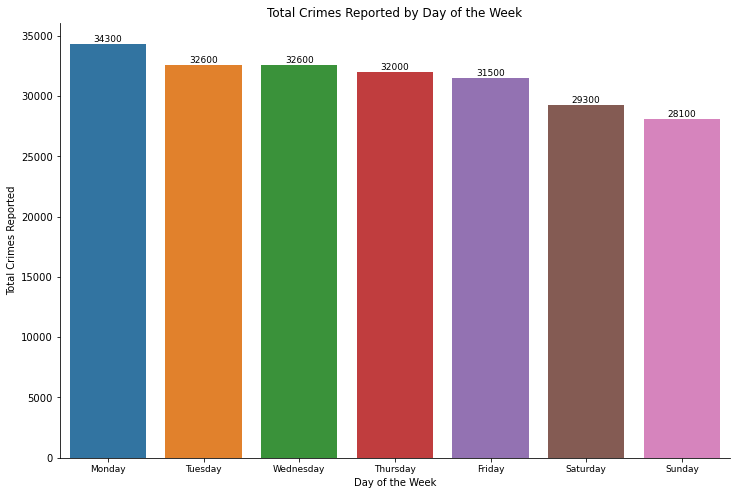

In [10]:
fig, ax = plt.subplots()
# Plotting crimes reported by day
sns.barplot(x=crime["Day Reported"].value_counts().index, y=crime["Day Reported"].value_counts())
# Axes
ax.set_title("Total Crimes Reported by Day of the Week")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Crimes Reported")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

##### 3.2.1.1.2. Crime Occurred by Day

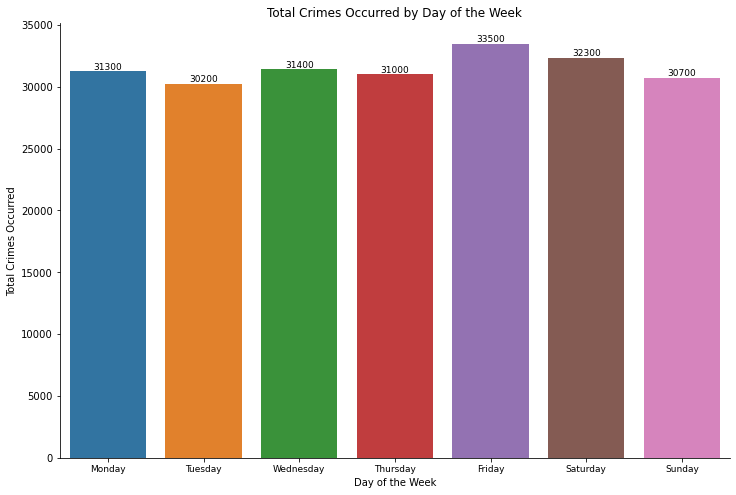

In [11]:
fig, ax = plt.subplots()
# Plotting crimes occurred by day
sns.barplot(x = crime["Day Occurred"].value_counts().index, y = crime["Day Occurred"].value_counts())
# Axes
ax.set_title("Total Crimes Occurred by Day of the Week")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Crimes Occurred")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

##### 3.2.1.1.3. Comparing Crime Reported and Occured by Day Side to Side

In [12]:
# Making a new dataframe
df1 = pd.DataFrame({
    "Day" : list(crime["Day Reported"].value_counts().index),
    "Crime Occurred" : list(crime["Day Occurred"].value_counts()),
    "Crime Reported" : list(crime["Day Reported"].value_counts())
})
dayrepocc = df1.set_index("Day").stack().reset_index().rename(columns={"level_1" : "Variable", 0 : "Crime"})

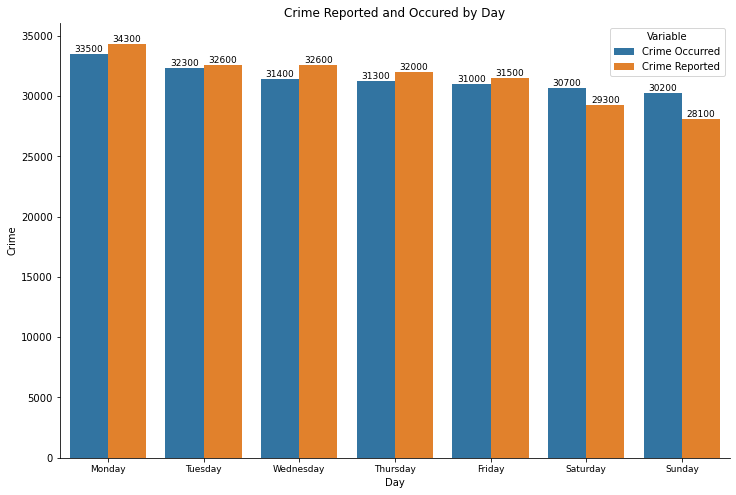

In [13]:
fig, ax = plt.subplots()
# Plotting side by side crime rep and occ by day
sns.barplot(x = "Day", y = "Crime", hue = "Variable", data=dayrepocc, ax=ax)
# Axes
ax.set_title("Crime Reported and Occured by Day")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_ylabel("Crime")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine(fig)

There are more crimes occurring on the weekends, yet fewer crimes reported on Saturday and Sunday. Probably because petty crimes are not reported till the weekdays.

#### 3.2.1.2. Crime by Month

##### 3.2.1.2.1. Crime Reported by Month

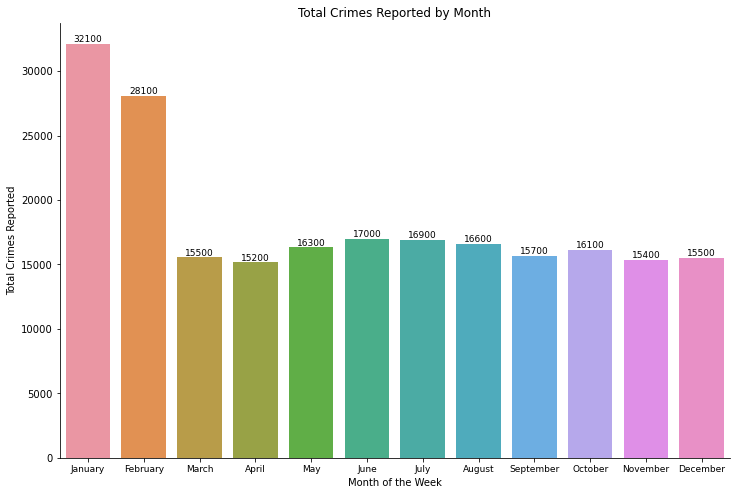

In [14]:
fig, ax = plt.subplots()
# Plotting crimes reported by month
sns.barplot(x = crime["Month Reported"].value_counts().index, y = crime["Month Reported"].value_counts())
# Axes
ax.set_title("Total Crimes Reported by Month")
ax.set_xticklabels(["January", "February", "March", "April", "May", "June",
                    "July", "August", "September", "October", "November", "December"], fontsize=9)
ax.set_xlabel("Month of the Week")
ax.set_ylabel("Total Crimes Reported")
# Adding Values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

##### 3.2.1.2.2. Crime Occurred by Month

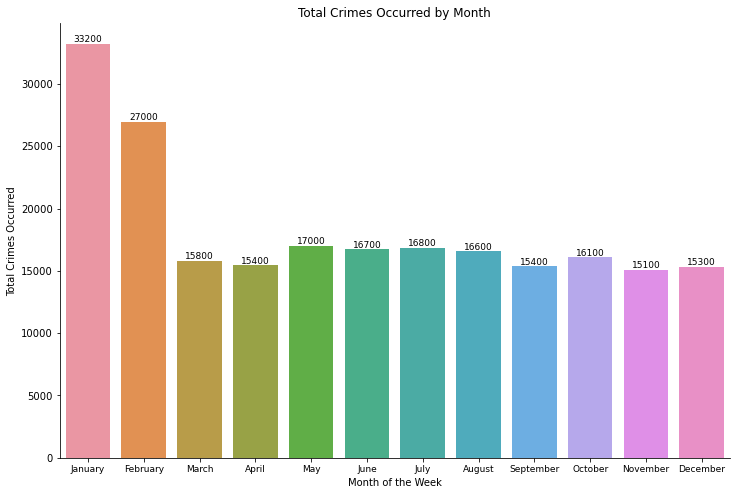

In [15]:
fig, ax = plt.subplots()
# Plotting crimes occurred by month
sns.barplot(x=crime["Month Occurred"].value_counts().index, y=crime["Month Occurred"].value_counts())
# Axes
ax.set_title("Total Crimes Occurred by Month")
ax.set_xticklabels(["January", "February", "March", "April", "May", "June",
                    "July", "August", "September", "October", "November", "December"], fontsize=9)
ax.set_xlabel("Month of the Week")
ax.set_ylabel("Total Crimes Occurred")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

##### 3.2.1.2.3. Comparing Crime Reported and Occurred by Month Side by Side

In [16]:
# Making a new dataframe
df2 = pd.DataFrame({
    "Month" : list(crime["Month Reported"].value_counts().index),
    "Crime Reported" : list(crime["Month Reported"].value_counts()),
    "Crime Occurred" : list(crime["Month Occurred"].value_counts())
})
monrepocc = df2.set_index("Month").stack().reset_index().rename(columns={"level_1" : "Variable", 0 : "Crime"})

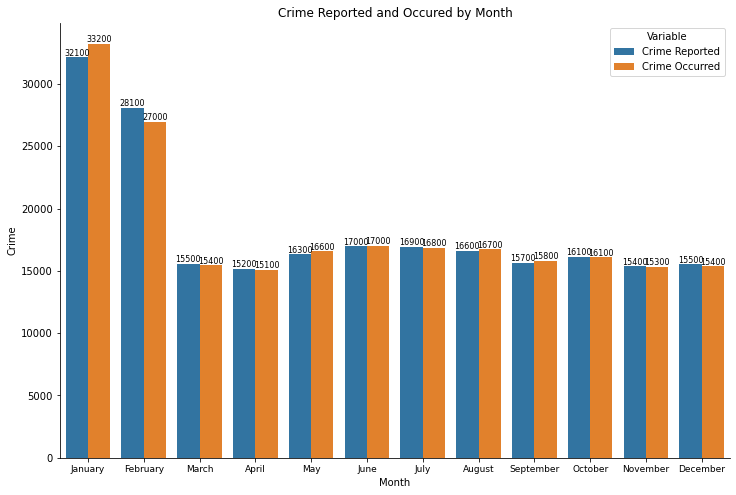

In [17]:
fig, ax = plt.subplots()
# Plotting side by side crime rep and occ by day
sns.barplot(x = "Month", y = "Crime", hue = "Variable", data=monrepocc, ax=ax)
# Axes
ax.set_title("Crime Reported and Occured by Month")
ax.set_xticklabels(["January", "February", "March", "April", "May", "June",
                    "July", "August", "September", "October", "November", "December"], fontsize=9)
ax.set_ylabel("Crime")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=8, color='black', ha='center', va='bottom')
sns.despine(fig)

As expected, months with fewer days in them generally have less crimes than the ones with 31 days.

There are fewer crimes stats in the last 4 months because the dataset is up to date until September 2020, hence lack of occurrences and reports.

#### 3.2.1.3. Crime by Year

##### 3.2.1.3.1. Crime Reported by Year

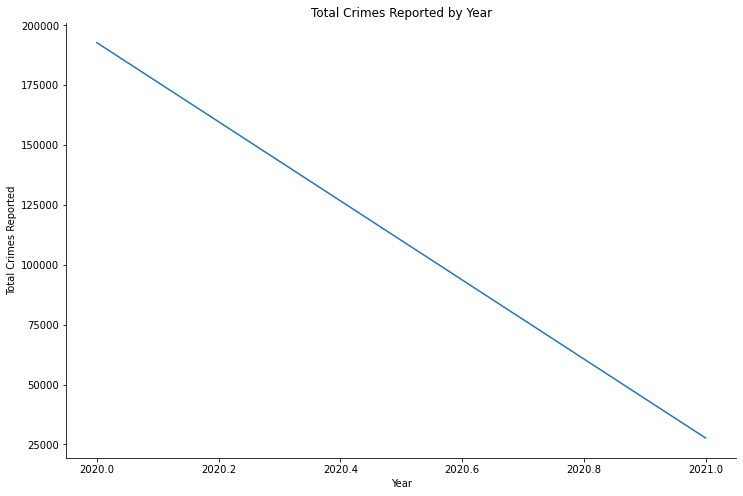

In [18]:
fig, ax = plt.subplots()
# Plotting crimes reported by year
plt.plot(crime["Year Reported"].value_counts().sort_index().index, crime["Year Reported"].value_counts().sort_index())
# Axes
ax.set_title("Total Crimes Reported by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Total Crimes Reported")
sns.despine()

##### 3.2.1.3.2. Crime Occurred by Year

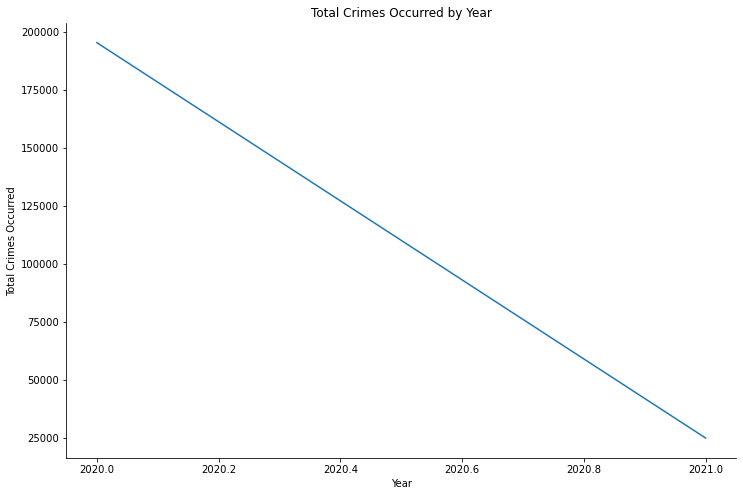

In [19]:
fig, ax = plt.subplots()
# Plotting crimes occured by year
plt.plot(crime["Year Occurred"].value_counts().sort_index().index, crime["Year Occurred"].value_counts().sort_index())
# AXes
ax.set_title("Total Crimes Occurred by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Total Crimes Occurred")
sns.despine()

##### 3.2.1.3.3. Comparing Crime Reported and Occured by Year Side to Side

In [20]:
# Making a new dataframe
df3 = pd.DataFrame({
    "Year" : list(crime["Year Reported"].value_counts().index),
    "Crime Reported" : list(crime["Year Reported"].value_counts()),
    "Crime Occurred" : list(crime["Year Occurred"].value_counts())
})
yearrepocc = df3.set_index("Year").stack().reset_index().rename(columns={"level_1" : "Variable", 0 : "Crime"})

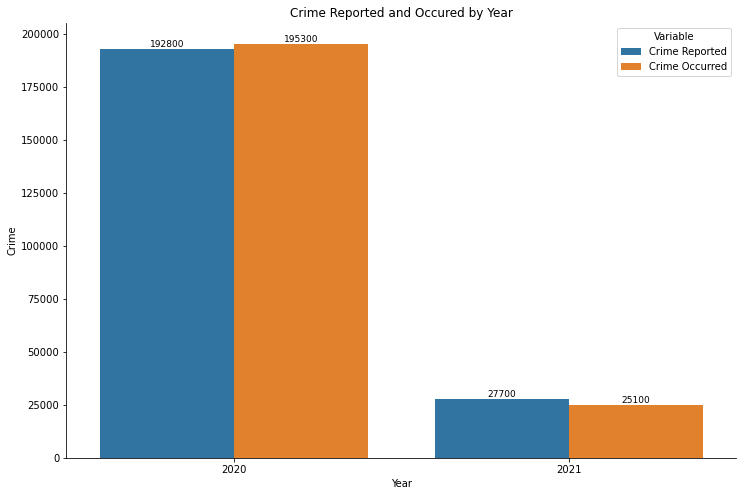

In [21]:
fig, ax = plt.subplots()
# Plotting side by side crime rep and occ by day
sns.barplot(x = "Year", y = "Crime", hue = "Variable", data=yearrepocc, ax=ax)
# Axes
ax.set_title("Crime Reported and Occured by Year")
ax.set_ylabel("Crime")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine(fig)

Based on the 3 previous graphs, it seems that crimes occurring and reported have been increasing the last 3 years.

This data is only up to date as of September of 2020 which explains why there are significantly less crimes in 2020.

### 3.2.2. Crime Chronologically

#### 3.2.2.1. Crimes Over Time

##### 3.2.2.1.1. Crimes Reported Over Time

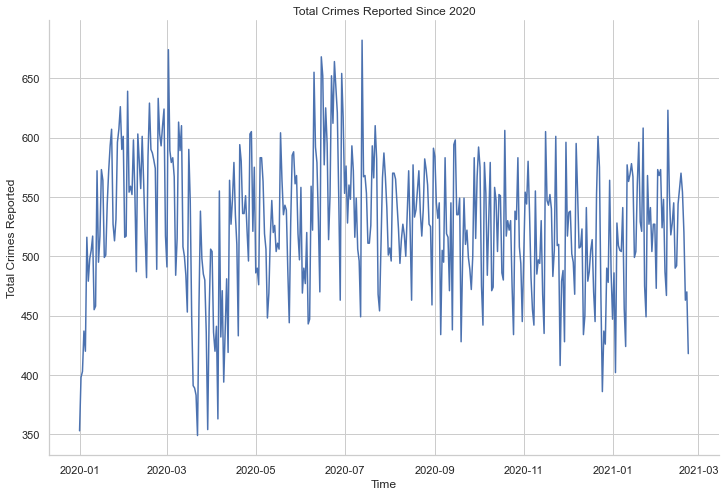

In [135]:
fig, ax = plt.subplots()
# Plot crimes reported over time
plt.plot(crime["Date Reported"].value_counts().sort_index().index, crime["Date Reported"].value_counts().sort_index())
# Axes
ax.set_title("Total Crimes Reported Since 2020")
ax.set_xlabel("Time")
ax.set_ylabel("Total Crimes Reported")
sns.despine()

We can barely see the upward trend of increasing crimes reported over the last few years.

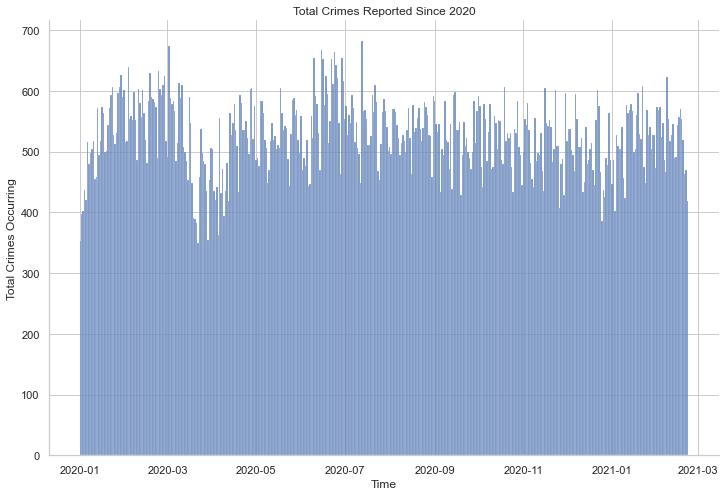

In [138]:
fig, ax = plt.subplots()
# Plot crime throughout a single day hours
sns.histplot(crime["Date Reported"])
# Axes
ax.set_title("Total Crimes Reported Since 2020")
ax.set_xlabel("Time")
ax.set_ylabel("Total Crimes Occurring")
sns.despine()

##### Crimes Occurred Over Time

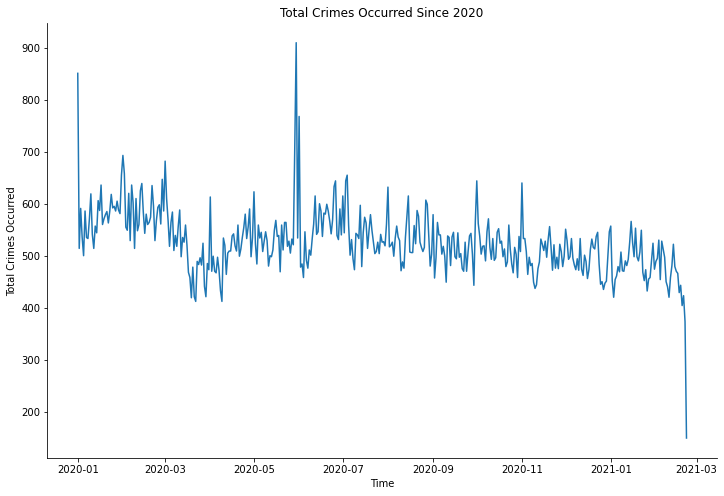

In [25]:
fig, ax = plt.subplots()
# Plot crimes occurred over time
plt.plot(crime["Date Occurred"].value_counts().sort_index().index, crime["Date Occurred"].value_counts().sort_index())
# Axes
ax.set_title("Total Crimes Occurred Since 2020")
ax.set_xlabel("Time")
ax.set_ylabel("Total Crimes Occurred")
sns.despine()

There are these spikes within crime occurrance dates which I atttribute to unknown date of the crime. It seems that if 
someone only realizes that they are a victim of identity theft, the paperwork for 'crime occurrence' are assumed to be a 
specific date.

In short, all crimes with unknown occurring date are all attributed to a specific date.

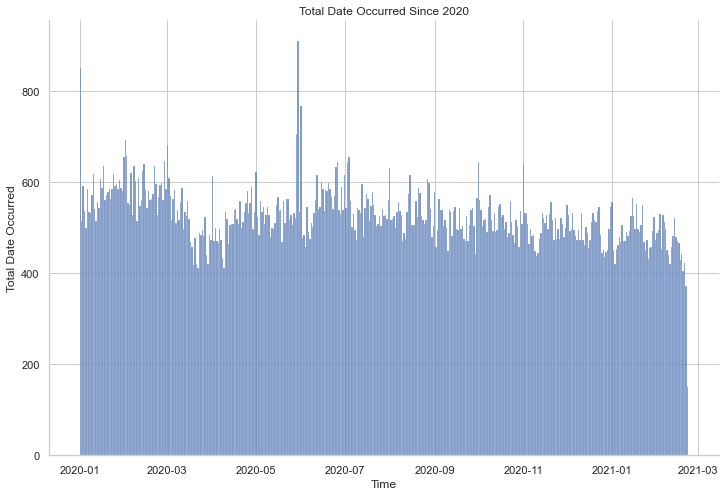

In [140]:
fig, ax = plt.subplots()
# Plot crime throughout a single day hours
sns.histplot(crime["Date Occurred"])
# Axes
ax.set_title("Total Date Occurred Since 2020")
ax.set_xlabel("Time")
ax.set_ylabel("Total Date Occurred")
sns.despine()

#### 3.2.2.2. Crimes Over Time by Month and Year

##### 3.2.2.2.1. Crimes Reported over Time by Month and Year

In [26]:
# Strip the month and the year as string
month_year_rep = [str(m)+"/"+str(y) for m,y in zip(crime["Month Reported"], crime["Year Reported"])]
# Make them date time objects as a list
month_year_rep_formatted = [dt.datetime.strptime(d, "%m/%Y") for d in month_year_rep]
# Turn the list of datetime month and year into a new column
crime["Month Year Rep"] = np.array(month_year_rep_formatted)

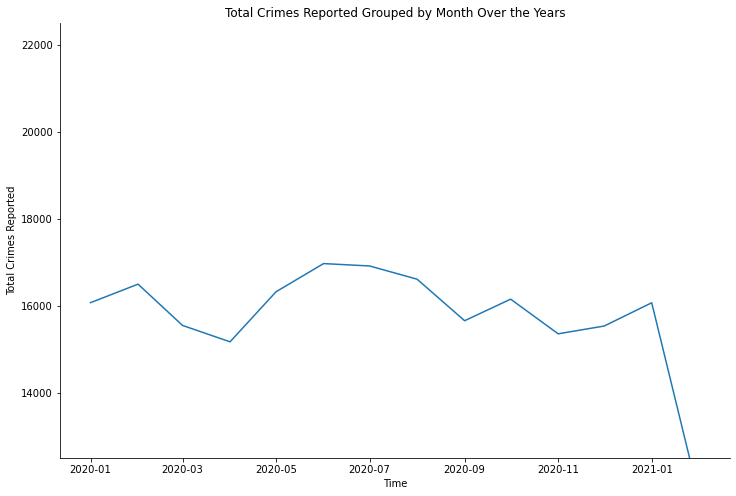

In [27]:
fig, ax = plt.subplots()
# Plot crimes reported over months and years
plt.plot(crime["Month Year Rep"].value_counts().sort_index().index, crime["Month Year Rep"].value_counts().sort_index())
# Axes
ax.set_title("Total Crimes Reported Grouped by Month Over the Years")
ax.set_ylim(12500, 22500)
ax.set_xlabel("Time")
ax.set_ylabel("Total Crimes Reported")
sns.despine()

Again, here we see the upward trend for the last 2 to 3 years.

##### 3.2.2.2.2. Crimes Occurred over Time by Month and Year

In [28]:
# Strip the month and the year as string
month_year_occ = [str(m)+"/"+str(y) for m,y in zip(crime["Month Occurred"], crime["Year Occurred"])]
# Make them date time objects as a list
month_year_occ_formatted = [dt.datetime.strptime(d, "%m/%Y") for d in month_year_occ]
# Turn the list of datetime month and year into a new column
crime["Month Year Occ"] = np.array(month_year_occ_formatted)

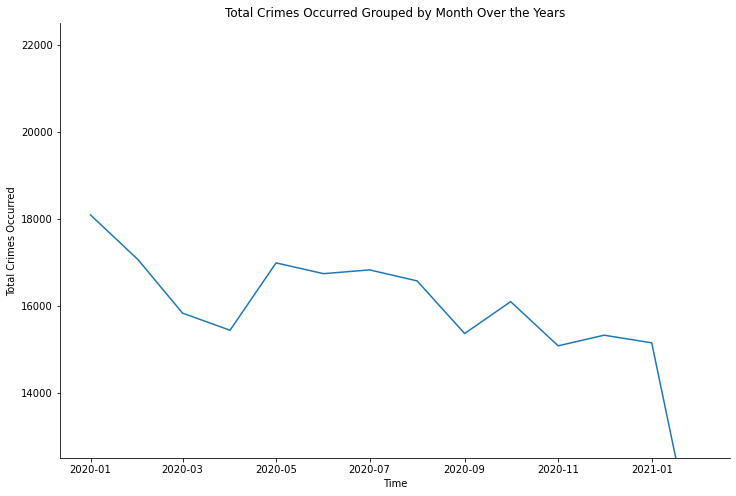

In [29]:
fig, ax = plt.subplots()
# Plot crimes occurred over months and years
plt.plot(crime["Month Year Occ"].value_counts().sort_index().index, crime["Month Year Occ"].value_counts().sort_index())
# Axes
ax.set_title("Total Crimes Occurred Grouped by Month Over the Years")
ax.set_ylim(12500, 22500)
ax.set_xlabel("Time")
ax.set_ylabel("Total Crimes Occurred")
sns.despine()

Some of the sharp increase which is followed a sharp decrease is attributed to January, then February.

## 3.3. Time Occurred

Since time is given in military format, it has to be formatted to be appropriately sorted through and indexed.

In [30]:
def makemil(time):
    ntime = ""
    if len(str(time)) == 1:
        ntime = "000" + str(time)
    if len(str(time)) == 2:
        ntime = "00" + str(time)
    if len(str(time)) == 3:
        ntime = "0" + str(time)
    if len(str(time)) == 4:
        ntime = str(time)
    return ntime

def returnhour(miltime):
    return miltime[:2]

In [141]:
# Formatting to 4 char string
crime["Time Occurred"] = crime["Time Occurred"].apply(makemil)

print(crime)

        DR Number Date Reported Date Occurred Time Occurred  Area ID  \
0        10304468    2020-01-08    2020-01-08          2230        3   
1       190101086    2020-01-02    2020-01-01          0330        1   
2       201220752    2020-09-16    2020-09-16          1230       12   
3       191501505    2020-01-01    2020-01-01          1730       15   
4       191921269    2020-01-01    2020-01-01          0415       19   
...           ...           ...           ...           ...      ...   
220400  212104002    2021-01-01    2021-01-01          0110       21   
220401  210904384    2021-01-12    2021-01-12          1030        9   
220402  210105139    2021-01-28    2021-01-24          1540        1   
220403  210404776    2021-01-21    2021-01-19          1600        4   
220404  212005847    2021-02-22    2021-02-22          1200       20   

          Area Name  Reporting District  Crime Code  \
0         Southwest                 377         624   
1           Central      

### 3.3.1. Crime Throughout the Day

In [32]:
# Formatting to int so it can be sorted
crime["Time Occurred Int"] = crime["Time Occurred"].apply(int)

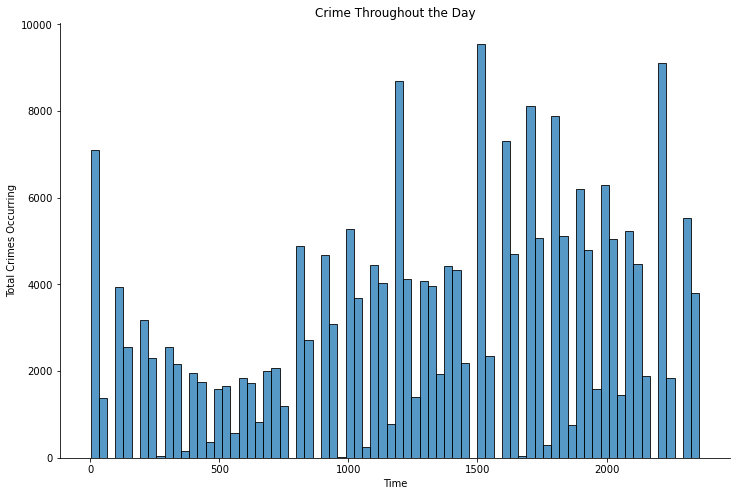

In [70]:
fig, ax = plt.subplots()
# Plot crime throughout a single day hours
sns.histplot(crime["Time Occurred Int"])
# Axes
ax.set_title("Crime Throughout the Day")
ax.set_xlabel("Time")
ax.set_ylabel("Total Crimes Occurring")
sns.despine()

### 3.3.2. Crime Throughout the Day by the Hour

In [34]:
# Extracting the hour out from time
crime["Hour Occurred"] = crime["Time Occurred"].apply(returnhour)

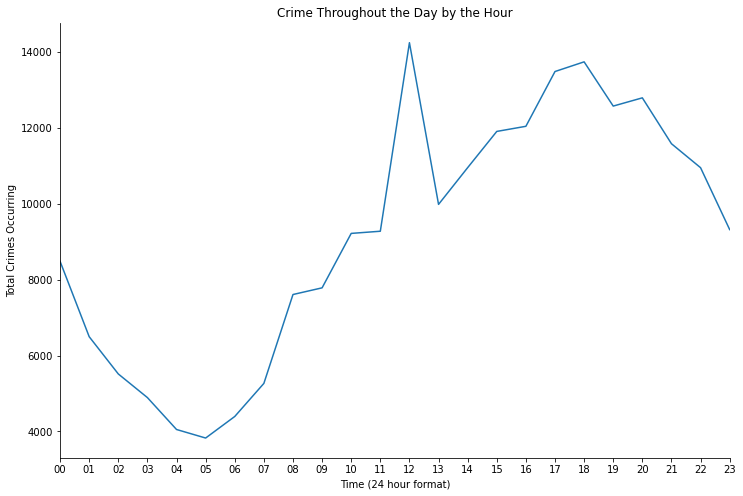

In [35]:
fig, ax = plt.subplots()
# Crime through the hours
plt.plot(crime["Hour Occurred"].value_counts().sort_index().index, crime["Hour Occurred"].value_counts().sort_index())
# Axes
ax.set_title("Crime Throughout the Day by the Hour")
plt.xticks(range(24))
plt.xlim(0,23)
plt.xlabel("Time (24 hour format)")
plt.ylabel("Total Crimes Occurring")
sns.despine()

From the above two graphs, it is evidently clear that there is a surge of crimes occurring at 12pm.

We shall delve into this later.

## 3.4. Area Name

/Users/trattanavilay/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


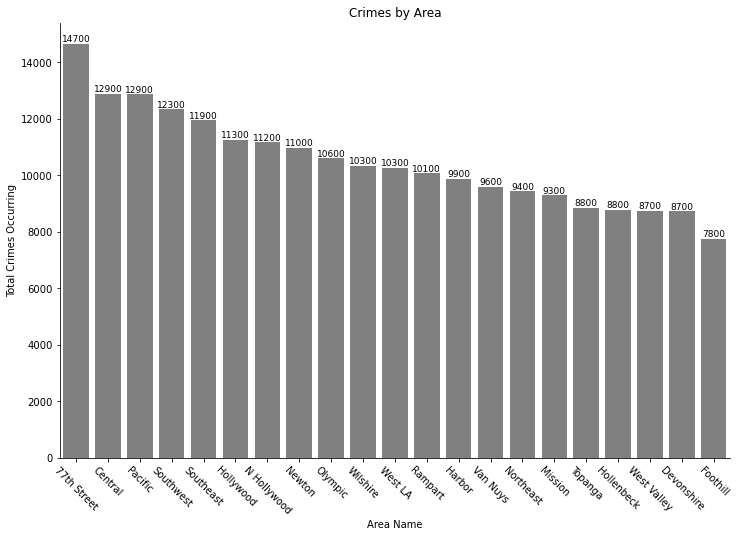

In [36]:
fig, ax = plt.subplots()
# Plotting crimes by neighborhood area
sns.barplot(crime["Area Name"].value_counts().index, crime["Area Name"].value_counts(), color="gray", ax=ax)
# Axes
ax.set_title("Crimes by Area")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
ax.set_xlabel("Area Name")
ax.set_ylabel("Total Crimes Occurring")
# Adding Values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

There are twice as much crimes in the 77th Street Area than Hollenbeck, which is interesting because of the population 
and square miles ratio.

* 77th Street: Approximately 175,000 population and 11.9 square miles.
* Hollenbeck: Apprioximately 200,000 population and 15.2 square miles.

## 3.5. Crime Code

In [37]:
# Tally total of top 20 crimes
crime["Crime Code Description"].value_counts().head(20)

VEHICLE - STOLEN                                            23853
BATTERY - SIMPLE ASSAULT                                    18243
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     14497
BURGLARY FROM VEHICLE                                       14340
BURGLARY                                                    14271
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              13007
INTIMATE PARTNER - SIMPLE ASSAULT                           12207
THEFT PLAIN - PETTY ($950 & UNDER)                          11884
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             10832
ROBBERY                                                      7858
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     7847
THEFT OF IDENTITY                                            7621
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     5944
THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)             5678
CRIMINAL THREATS - NO WEAPON DISPLAYED                       4722
SHOPLIFTIN

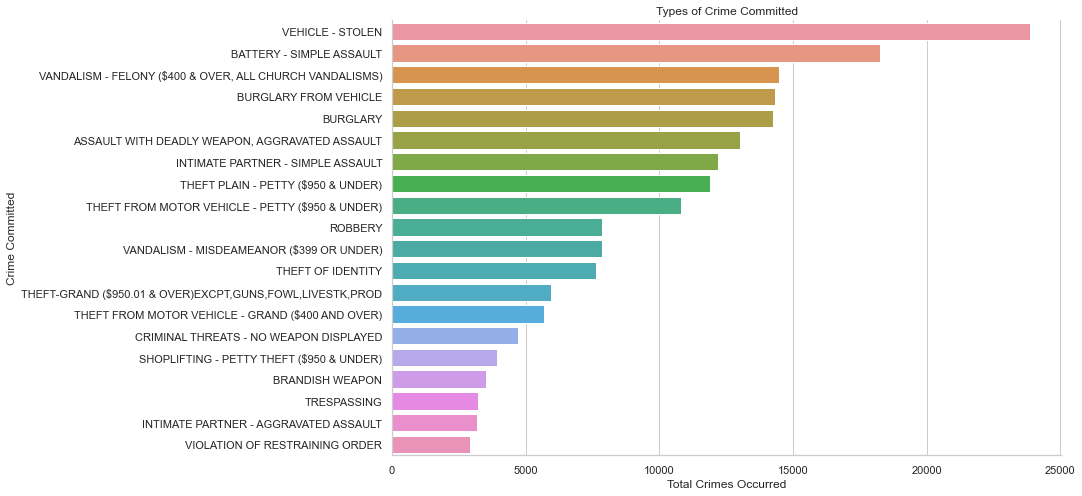

In [127]:
# Since the number of unique crimes are more than 100, plot top 20
fig, ax = plt.subplots()
# Plotting crimes by type
sns.barplot(y=crime["Crime Code Description"].value_counts().index[0:20], 
                 x=crime["Crime Code Description"].value_counts().head(20), ax=ax)
# Axes
ax.set_title("Types of Crime Committed")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Crime Committed")
sns.despine()

Battery leads the crime chart with a difference of at least 10% from the next crimes, Burglary from Vehicle & Stolen Vehicle.

In [131]:
# Tally total of top 20 weapons
crime["Weapon Description"].value_counts().head(20)

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    43421
UNKNOWN WEAPON/OTHER WEAPON                        8878
VERBAL THREAT                                      5823
HAND GUN                                           4633
SEMI-AUTOMATIC PISTOL                              1806
KNIFE WITH BLADE 6INCHES OR LESS                   1716
UNKNOWN FIREARM                                    1645
OTHER KNIFE                                        1392
VEHICLE                                             804
ROCK/THROWN OBJECT                                  792
MACE/PEPPER SPRAY                                   739
BOTTLE                                              662
PIPE/METAL PIPE                                     662
CLUB/BAT                                            593
STICK                                               584
FOLDING KNIFE                                       556
KITCHEN KNIFE                                       509
AIR PISTOL/REVOLVER/RIFLE/BB GUN                

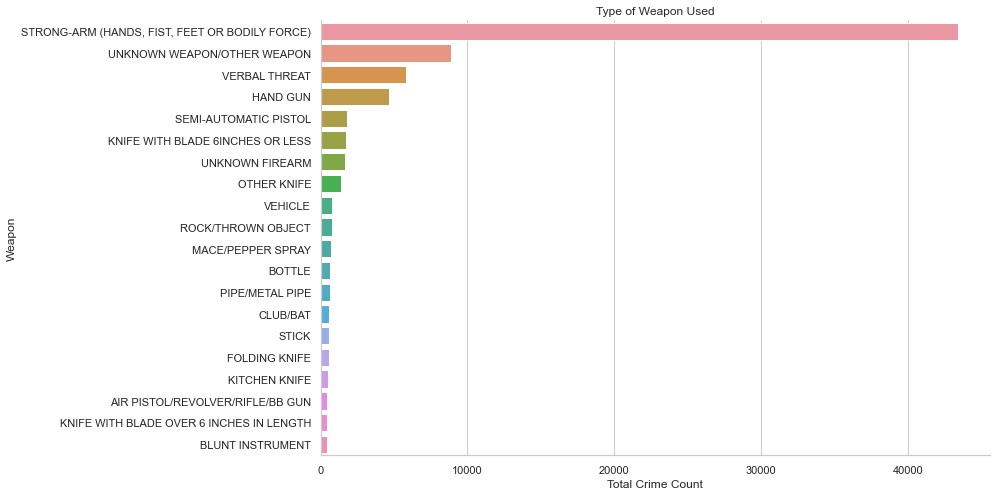

In [133]:
# Since the number of unique Weapon are more than 100, plot top 20
fig, ax = plt.subplots()
# Plotting crimes by type
sns.barplot(y=crime["Weapon Description"].value_counts().index[0:20], 
                 x=crime["Weapon Description"].value_counts().head(20), ax=ax)
# Axes
ax.set_title("Type of Weapon Used")
ax.set_xlabel("Total Crime Count")
ax.set_ylabel("Weapon")
sns.despine()

## 3.6. MO Codes

MO, or Modus Operandi, is defined by Wikipedia as someone's habits of working. Particularly, the actions involved in a crime.

In [39]:
# Splitting the MO codes per whitespace
MO_list = []
for item in crime["MO Codes"].dropna():
    MO_list.append(str(item).split())

In [43]:
# Making a new DataFrame for MO Codes
tempo_MO_split = []
for i in MO_list:
    for j in i:
        tempo_MO_split.append("MO "+j)
        
tempo_MO_split = np.array(tempo_MO_split)

pre_MO_df = [["","MO Codes"]]
for i in range(len(tempo_MO_split)):
    pre_MO_df.append([i, tempo_MO_split[i]])
    
pre_MO_data = np.array(pre_MO_df)

post_MO_df = pd.DataFrame(data=pre_MO_data[1:,1:],
                  index=pre_MO_data[1:,0],
                  columns=pre_MO_data[0,1:])

/Users/trattanavilay/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


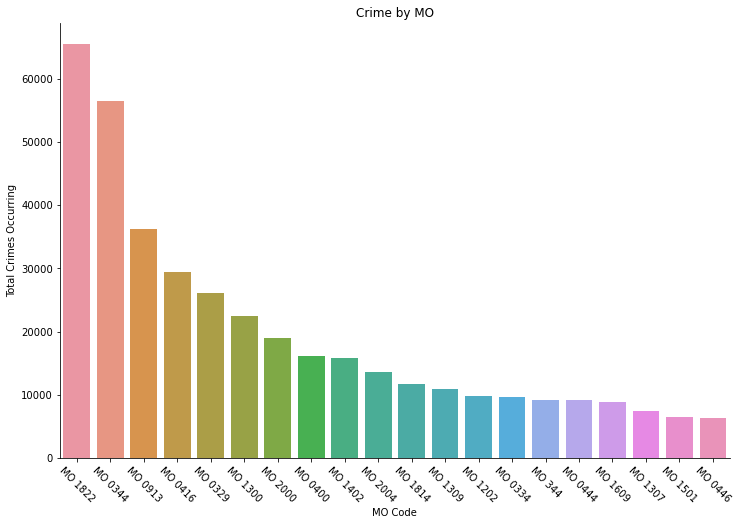

In [44]:
fig, ax = plt.subplots()
# Looking into crime by MO
sns.barplot(post_MO_df["MO Codes"].value_counts().index[:20], post_MO_df["MO Codes"].value_counts().head(20), ax=ax)
# Axes
ax.set_title("Crime by MO")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
ax.set_xlabel("MO Code")
ax.set_ylabel("Total Crimes Occurring")
sns.despine()

[MO Codes Description](https://drive.google.com/file/d/0B_pE2uXYbVrDTFRONThLR2MtZlE/view?usp=sharing)

* MO 0344: Removes vict property
* MO 0416: Hit-hit w/ weapon
* MO 0329: Vandalized
* MO 1822: Stranger
* MO 2000: Domestic violence


## 3.7. Victim Age

In [45]:
# Basic stats about Victim Age
crime["Victim Age"].describe()[1:]

mean     29.877657
std      21.765205
min      -1.000000
25%       6.000000
50%      31.000000
75%      45.000000
max     120.000000
Name: Victim Age, dtype: float64

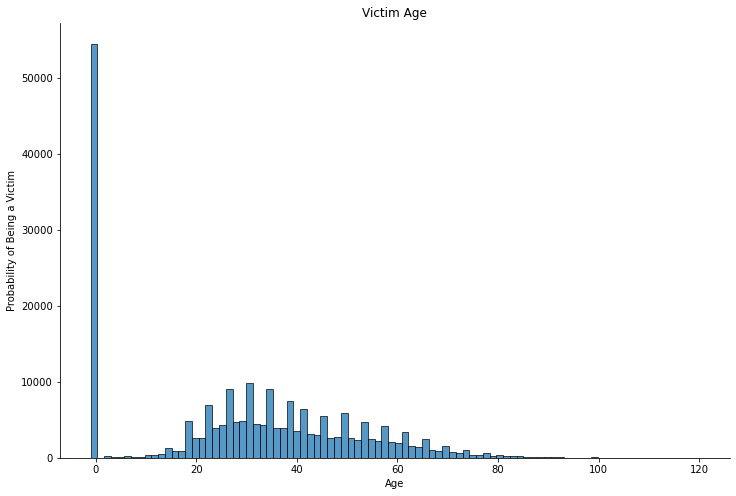

In [69]:
fig, ax = plt.subplots()
# Plotting victim's age distribution
sns.histplot(crime["Victim Age"].dropna(), bins=90, ax=ax)
# Axes
ax.set_title("Victim Age")
ax.set_xlabel("Age")
ax.set_ylabel("Probability of Being a Victim")
sns.despine()

Mean of the victims are 35, and is supported by a median of 34.

## 3.8. Victim Sex

In [47]:
# Victim Sex Demographics
crime["Victim Sex"].value_counts()                                

M    93780
F    78992
X    18565
H       17
Name: Victim Sex, dtype: int64

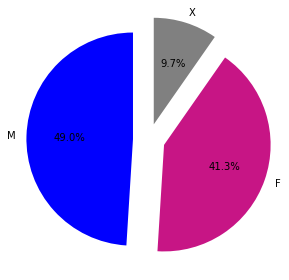

In [48]:
fig, ax = plt.subplots(figsize=(6,4))
# Plotting piechart of victim sex
ax.pie(crime["Victim Sex"].value_counts()[:3],labels=crime["Victim Sex"].value_counts()[:3].index, startangle=90, 
       explode=(0.15,0.15,.15), autopct="%0.1f%%", colors=("blue","mediumvioletred","gray"))
fig.tight_layout()

## 3.9. Victim Descent

In [49]:
# Changing the abbreviations to the whole description
Victims_bg = {
    "A": "Other Asian",
    "B": "Black",
    "C": "Chinese",
    "D": "Cambodian",
    "F": "Filipino",
    "G": "Guamanian",
    "H": "Hispanic/Latin/Mexican",
    "I": "American Indian/Alaskan Native",
    "J": "Japanese",
    "K": "Korean",
    "L": "Laotian",
    "O": "Other",
    "P": "Pacific Islander",
    "S": "Samoan",
    "U": "Hawaiian",
    "V": "Vietnamese",
    "W": "White",
    "X": "Unknown",
    "Z": "Asian Indian"
}
crime["Victim Descent"] = crime["Victim Descent"].map(Victims_bg)

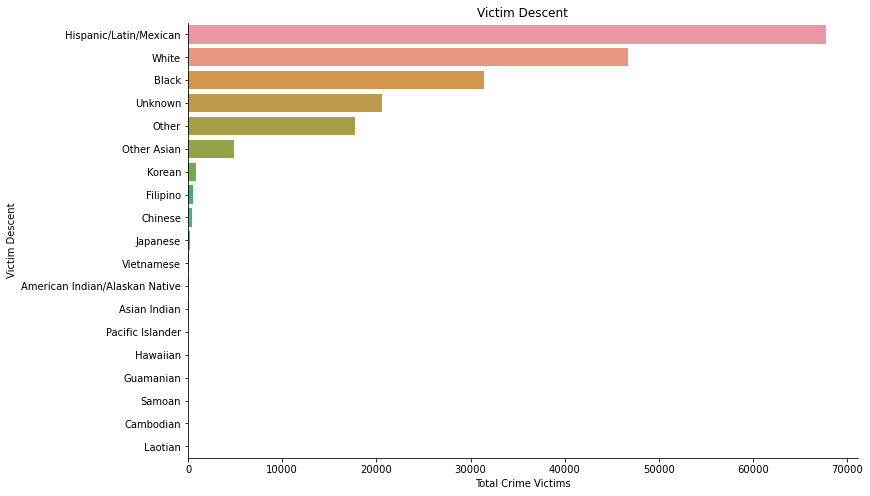

In [50]:
fig, ax = plt.subplots()
# Plotting by victim descent generally
sns.barplot(y=crime["Victim Descent"].value_counts().index, x=crime["Victim Descent"].value_counts(), ax=ax)
# Axes
ax.set_title("Victim Descent")
ax.set_xlabel("Total Crime Victims")
ax.set_ylabel("Victim Descent")
sns.despine()

## 3.10. Premise Description

In [51]:
# Previewing the total tally
crime["Premise Description"].value_counts()

STREET                                          57214
SINGLE FAMILY DWELLING                          36046
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    26365
PARKING LOT                                     16364
SIDEWALK                                        10378
                                                ...  
AMUSEMENT PARK*                                     1
MTA - SILVER LINE - UNION STATION                   1
HANDBALL COURTS                                     1
BANK DROP BOX/MONEY DROP-OUTSIDE OF BANK*           1
MTA - SILVER LINE - SLAUSON                         1
Name: Premise Description, Length: 298, dtype: int64

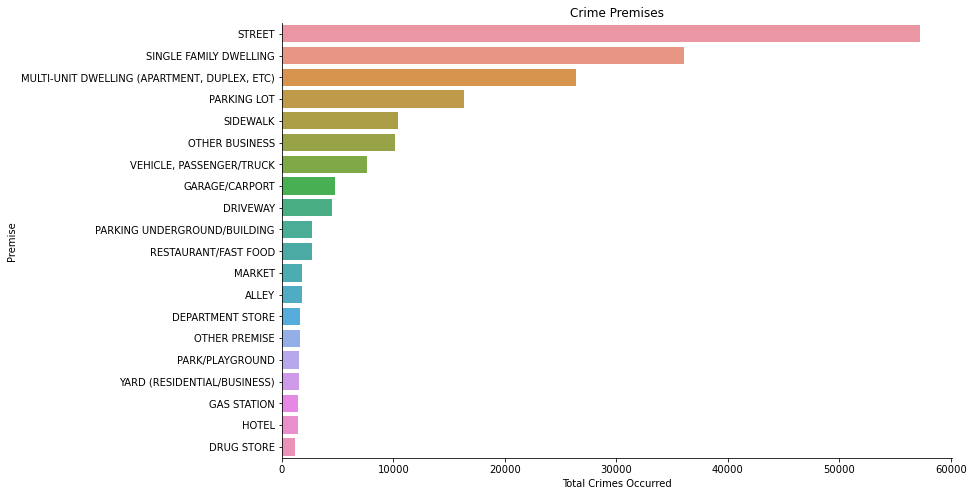

In [52]:
# We will only be looking at the top 20 premises
fig, ax = plt.subplots()
# Plotting top 20 premises
sns.barplot(y=crime["Premise Description"].value_counts().head(20).index,
                 x=crime["Premise Description"].value_counts().head(20), ax=ax)
# Axes
ax.set_title("Crime Premises")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Premise")
sns.despine()

We shall look further into the types of crime that happen at the top premises.

## 3.11. Weapon Description

In [53]:
# Number of Na values
missvals = crime["Weapon Description"].isnull().sum()
print("There are {} missing values".format(missvals))

There are 139192 missing values


We assume that missing values are either truly missing, or no weapon was used.

In [54]:
crime["Weapon Description"].value_counts().head(10)

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    43421
UNKNOWN WEAPON/OTHER WEAPON                        8878
VERBAL THREAT                                      5823
HAND GUN                                           4633
SEMI-AUTOMATIC PISTOL                              1806
KNIFE WITH BLADE 6INCHES OR LESS                   1716
UNKNOWN FIREARM                                    1645
OTHER KNIFE                                        1392
VEHICLE                                             804
ROCK/THROWN OBJECT                                  792
Name: Weapon Description, dtype: int64

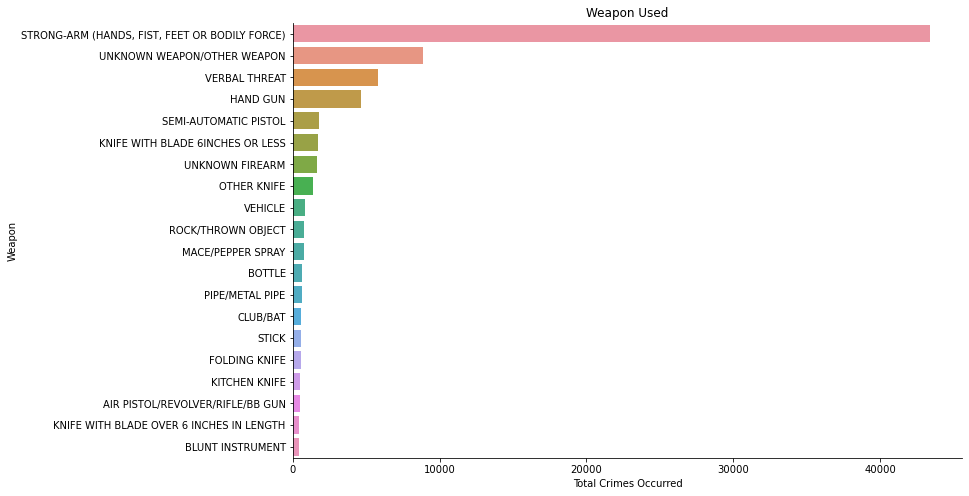

In [55]:
fig, ax = plt.subplots()
# Plotting weapons used
sns.barplot(y=crime["Weapon Description"].value_counts().head(20).index,
                 x=crime["Weapon Description"].value_counts().head(20), ax=ax)
# Axes
ax.set_title("Weapon Used")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Weapon")
sns.despine()

## 3.12. Status Description

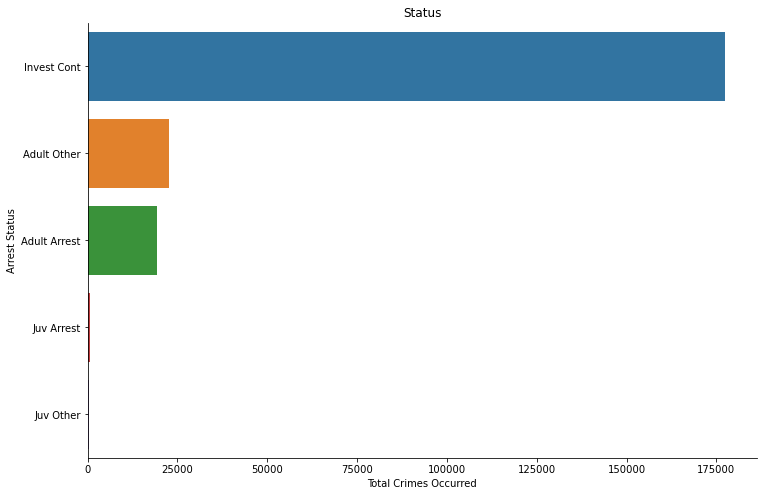

In [56]:
fig, ax = plt.subplots()
# Plotting the arrest status
sns.barplot(y=crime["Status Description"].value_counts().index,
                 x=crime["Status Description"].value_counts(), ax=ax)
# Axes
ax.set_title("Status")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Arrest Status")
sns.despine()

It is surprising that there are 6 times more ongoing investigations than adult arrests.

## 3.13. Crime Code

In [71]:
# Making a new dataframe
CC_list = []
for i in range(1,5):
    for item in crime["Crime Code "+str(i)].dropna():
        CC_list.append("Code " +str(int(item)))
        
tempo_CC = np.array(CC_list)

CC_df = pd.DataFrame(tempo_CC)
CC_df = CC_df.rename(columns = {0 : "Crime Codes"})

/Users/trattanavilay/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


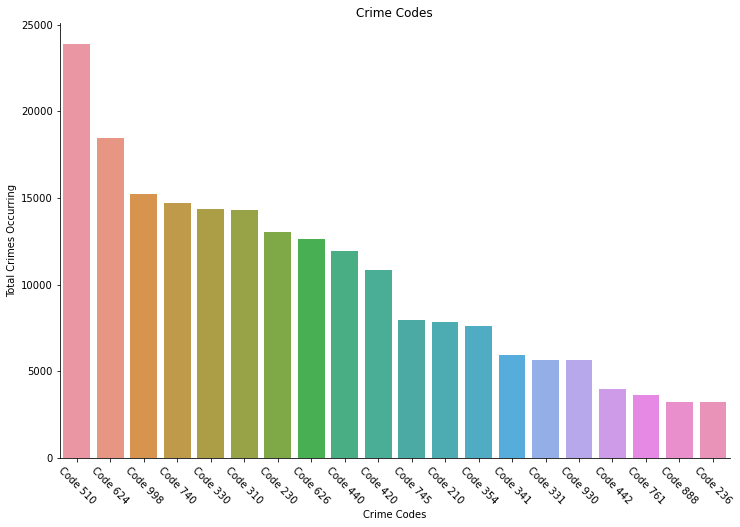

In [74]:
fig, ax = plt.subplots()
# Plotting crime codes
ax = sns.barplot(CC_df["Crime Codes"].value_counts().head(20).index, CC_df["Crime Codes"].value_counts().head(20))
# Axes
ax.set_title("Crime Codes")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
ax.set_xlabel("Crime Codes")
ax.set_ylabel("Total Crimes Occurring")
sns.despine()

Crime Codes

# 4. Data Exploration

## 4.1. Are certain genders more prone to become victims for certain crimes?

In [75]:
# Removing Entries for X and H and - (by elimination)
crime["Victim Gender"] = crime["Victim Sex"][crime["Victim Sex"] != "X"]
crime["Victim Gender"] = crime["Victim Gender"][crime["Victim Gender"] != "H"]
crime["Victim Gender"] = crime["Victim Gender"][crime["Victim Gender"] != "-"]

In [76]:
# Combining two columns into a dataframe
cc_vg = crime[["Crime Code Description", "Victim Gender"]]
# Dropping null values
cc_vg = cc_vg[pd.notnull(cc_vg["Victim Gender"])]

In [77]:
# Saving top 10 crimes
crimetop10 = cc_vg["Crime Code Description"].value_counts().head(10).index
# Choosing data that is included in the top 10 crimes (by selection)
crimecc = cc_vg.loc[cc_vg["Crime Code Description"].isin(crimetop10)]

In [78]:
# Group by Crime Code Description and Victim Gender
cc_gender = crimecc.groupby(["Crime Code Description", "Victim Gender"]).size().reset_index(name="Count")
cc_gender

,Crime Code Description,Victim Gender,Count
0,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",F,3461
1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",M,9281
2,BATTERY - SIMPLE ASSAULT,F,8647
3,BATTERY - SIMPLE ASSAULT,M,9504
4,BURGLARY,F,3713
5,BURGLARY,M,7253
6,BURGLARY FROM VEHICLE,F,6033
7,BURGLARY FROM VEHICLE,M,8005
8,INTIMATE PARTNER - SIMPLE ASSAULT,F,9139
9,INTIMATE PARTNER - SIMPLE ASSAULT,M,3044


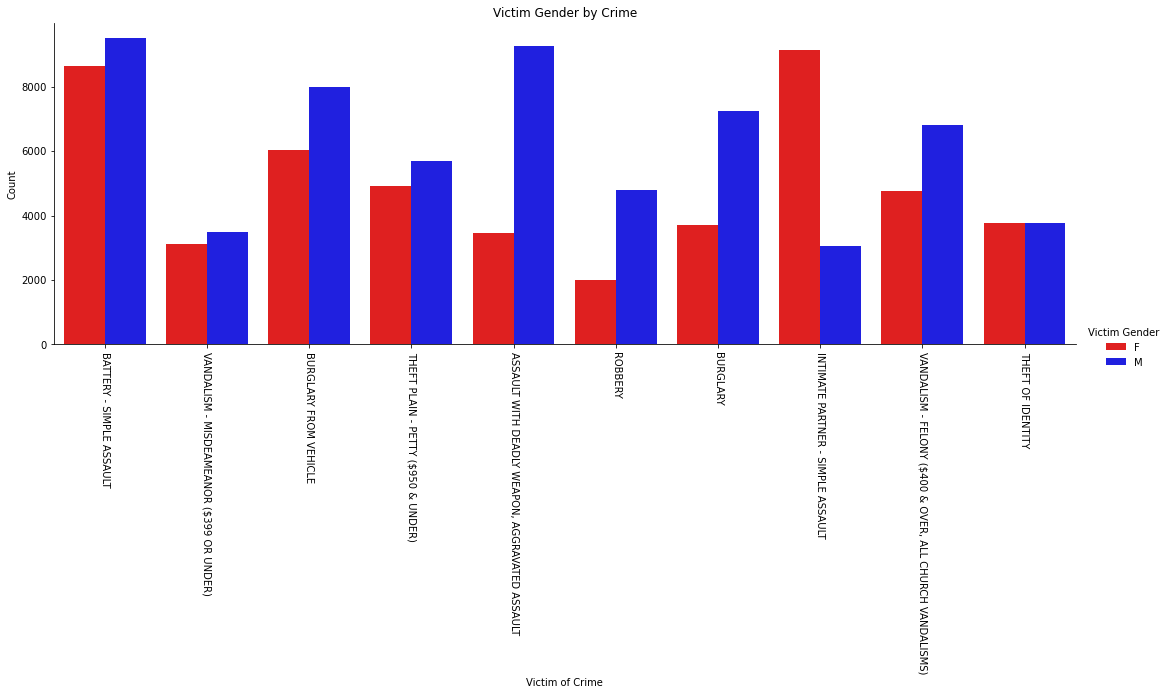

In [79]:
# catplot Crime and Gender based on count
ax = sns.catplot(x="Crime Code Description", hue="Victim Gender", kind="count", data=crimecc, height=5, aspect=3, 
                    palette=["red", "blue"])
# Axes
plt.title("Victim Gender by Crime")
ax.set_xticklabels(rotation=-90)
ax.set_xlabels("Victim of Crime")
ax.set_ylabels("Count")
sns.despine()

Some things to note are:
* The close to equal distribution for vandalism (misdemeanor) and identity theft.
* The two crimes that women victims are more often are Intimate partner sexual assault & Battery simple assault.
* I would expect that burglary from vehicle or stolen vehicle would have equal distribution. It is just probably just that there are more cars owned by males than females.

## 4.2. Gun Crimes and Hour Occurred

In [80]:
# Filtering only rows with Hand guns or Semi-automatic pistols (by equal to)
crime["Guns Only"] = crime["Weapon Description"][(crime["Weapon Description"] == "HAND GUN") | 
                                                 (crime["Weapon Description"] == "SEMI-AUTOMATIC PISTOL")]

In [81]:
# Group by Guns Only and Hour Occurred
cc_gender = crime.groupby(["Hour Occurred", "Guns Only"]).size().reset_index(name="Count")
cc_gender.tail(6)

,Hour Occurred,Guns Only,Count
42,21,HAND GUN,335
43,21,SEMI-AUTOMATIC PISTOL,143
44,22,HAND GUN,342
45,22,SEMI-AUTOMATIC PISTOL,130
46,23,HAND GUN,365
47,23,SEMI-AUTOMATIC PISTOL,110


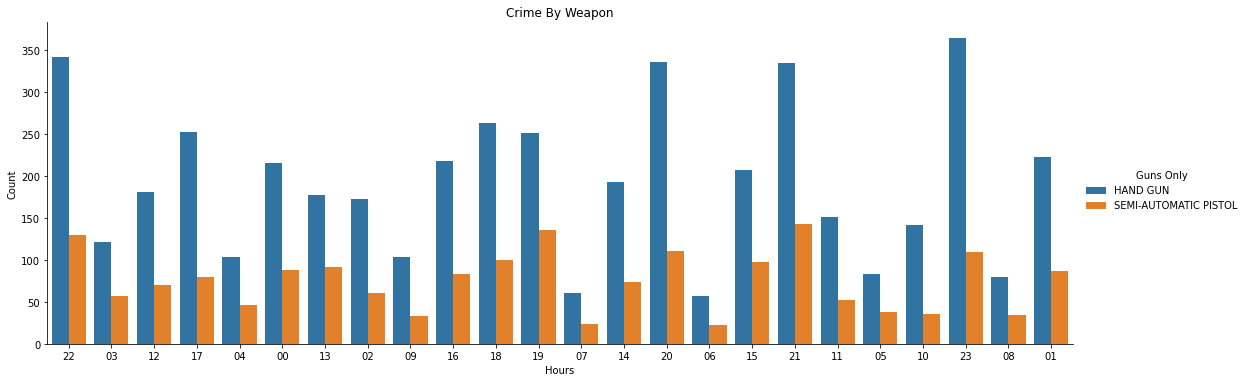

In [84]:
# Catplot Crimes by Weapon used
ax = sns.catplot(x="Hour Occurred", hue="Guns Only", kind="count", data=crime, height=5, aspect=3)
# Axes
plt.title("Crime By Weapon")
ax.set_xlabels("Hours")
ax.set_ylabels("Count")
sns.despine()

As we can see, firearm activites occur at night, between 7pm to just before midnight.

## 4.3. Premise and Hour Occurred

In [85]:
crime["Premise Description"].value_counts().head(5)

STREET                                          57214
SINGLE FAMILY DWELLING                          36046
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    26365
PARKING LOT                                     16364
SIDEWALK                                        10378
Name: Premise Description, dtype: int64

In [86]:
# Filtering crimes that happen by top 5 by (by equal to)
crime["Public Premise"] = crime["Premise Description"][(crime["Premise Description"] == "STREET") |
                                                       (crime["Premise Description"] == "SINGLE FAMILY DWELLING") | 
                                                       (crime["Premise Description"] == "MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)") |
                                                       (crime["Premise Description"] == "PARKING LOT") |
                                                       (crime["Premise Description"] == "SIDEWALK")]

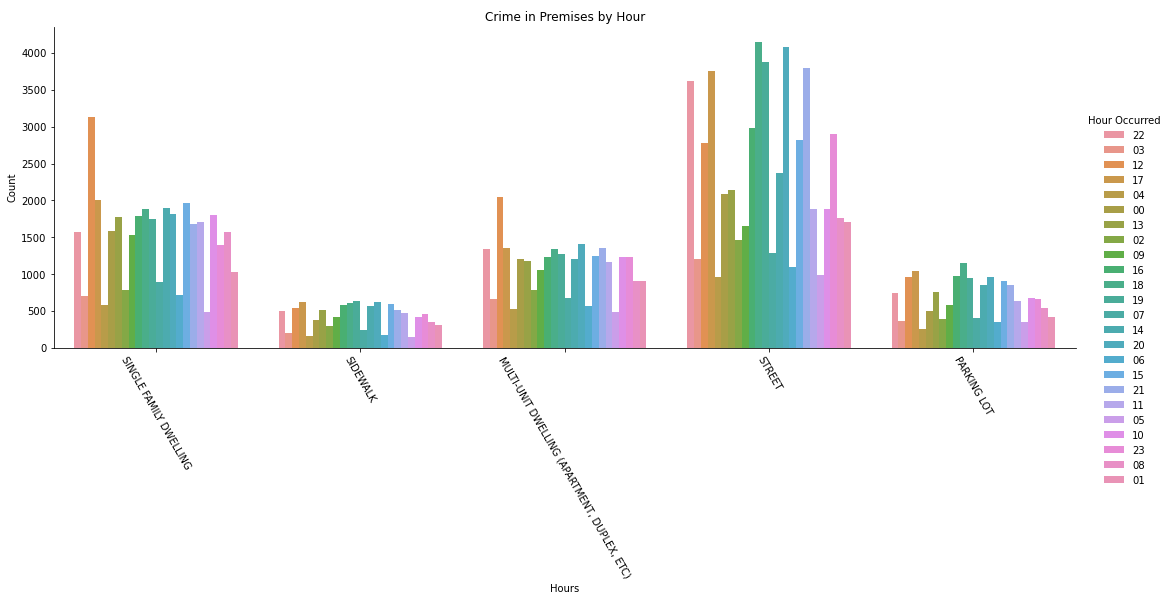

In [89]:
# catplot Crime and Gender based on count
ax = sns.catplot(x="Public Premise", hue="Hour Occurred", kind="count", data=crime, height=5, aspect=3)
# Axes
plt.title("Crime in Premises by Hour")
ax.set_xticklabels(rotation=-60)
ax.set_xlabels("Hours")
ax.set_ylabels("Count")
sns.despine()

* Streets are generally more unsafe at night, so are sidewalks.
* In dwellings, we see the 12pm surge of crimes again, which will be covered later.

## 4.4 Premise and Type of Crime

In [92]:
# Saving top 10 types of crime
crimetoptype = crime["Crime Code Description"].value_counts().head(16).index
# Choosing data that is included in the top 10 types of crimes (by selection)
crimepremtype = crime.loc[crime["Crime Code Description"].isin(crimetoptype)]

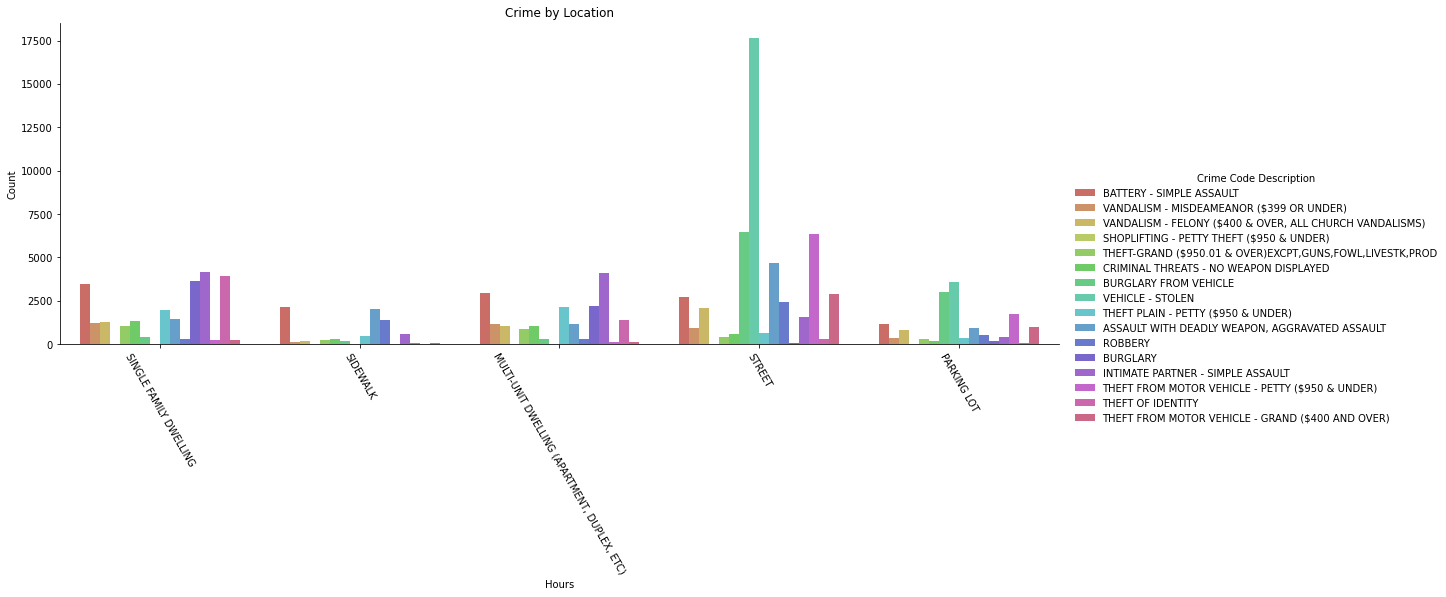

In [98]:
# Type of Crime by Location
sns.set_palette("hls", n_colors=16)
ax = sns.catplot(x="Public Premise", hue="Crime Code Description", kind="count", data=crimepremtype, height=5, aspect=3)
# Axes
plt.title("Crime by Location")
ax.set_xticklabels(rotation=-60)
ax.set_xlabels("Hours")
ax.set_ylabels("Count")
sns.despine()

It is interesting to see that with the same amount of intimate partner sexual assault in mult-units and single family dwelling, the difference in identity theft and burglary is so significant.

Another thing is that vehicles are stolen four times more often in the street compared to the parking lot.

## 4.5. Juvenile Arrests

I plan to explore juvenile arrests to try and reduce it in the future.

There is no clear way to look at the infographics of the juvenile offender, so we shall look at who the victims are.

In [99]:
# Filtering the dataset with juvenile arrests (by selection)
crimejuv = crime.loc[crime["Status Description"].isin(["Juv Arrest"])]

In [100]:
crimejuv.shape

(737, 39)

In [101]:
# Resetting color and size from above
sns.set()
rcParams['figure.figsize'] = (12,8)

### 4.5.1. Who

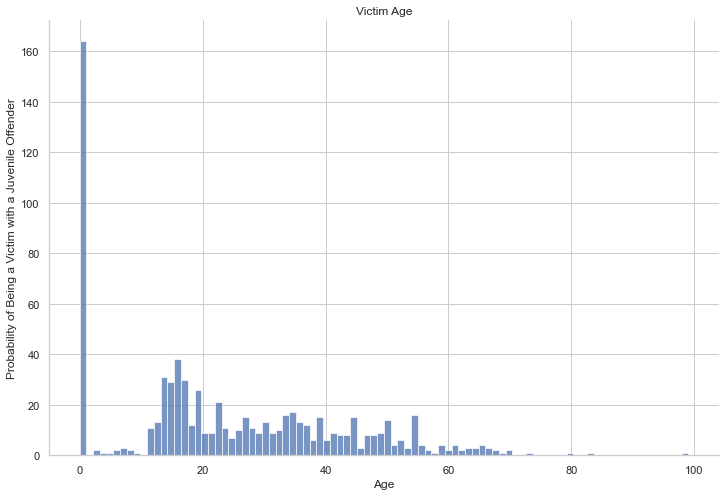

In [103]:
# Juvenile Victims Age Distribution
fig, ax = plt.subplots()
ax = sns.histplot(crimejuv["Victim Age"].dropna(), bins=90)
sns.set_style("whitegrid")
ax.set_title("Victim Age")
ax.set_ylabel("Probability of Being a Victim with a Juvenile Offender")
ax.set_xlabel("Age")
sns.despine()

The arrested offender is a juvenile. The Victim of the offender tends to be between 12 to 18 it seems.

### 4.5.2. What

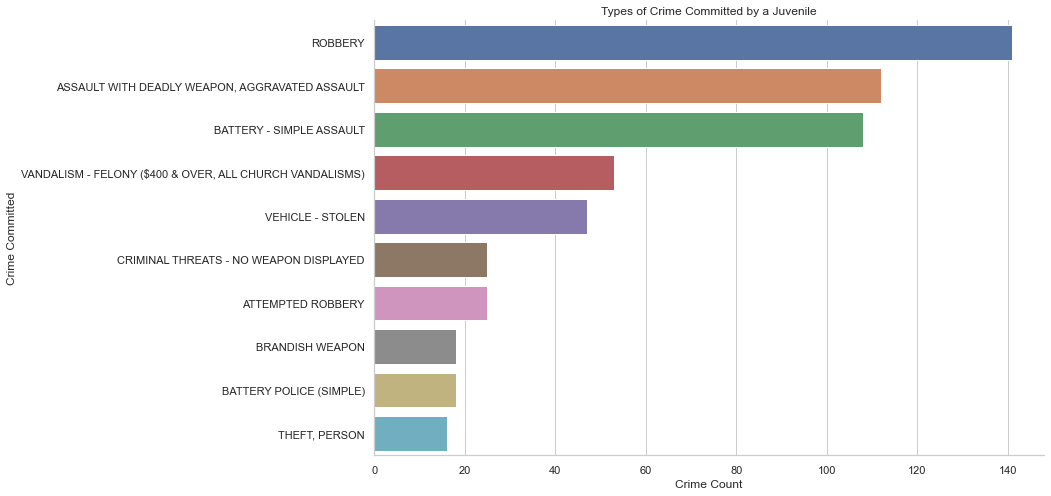

In [104]:
# Plotting top 10 types of crime committed by a juvenile.
fig, ax = plt.subplots()
# Axes
ax = sns.barplot(y=crimejuv["Crime Code Description"].value_counts().index[0:10], 
                 x=crimejuv["Crime Code Description"].value_counts().head(10))
ax.set_title("Types of Crime Committed by a Juvenile")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Crime Committed")
sns.despine()

Going in, I expected shoplifting and vandalism to be the top contenders but I was not really surprised that battery simple assault takes the lead.

We have to reduce the violent characteristics of kids at a young age. There are several suspected sources such as media, videogames, and family that can affect violence.

### 4.5.3. Where

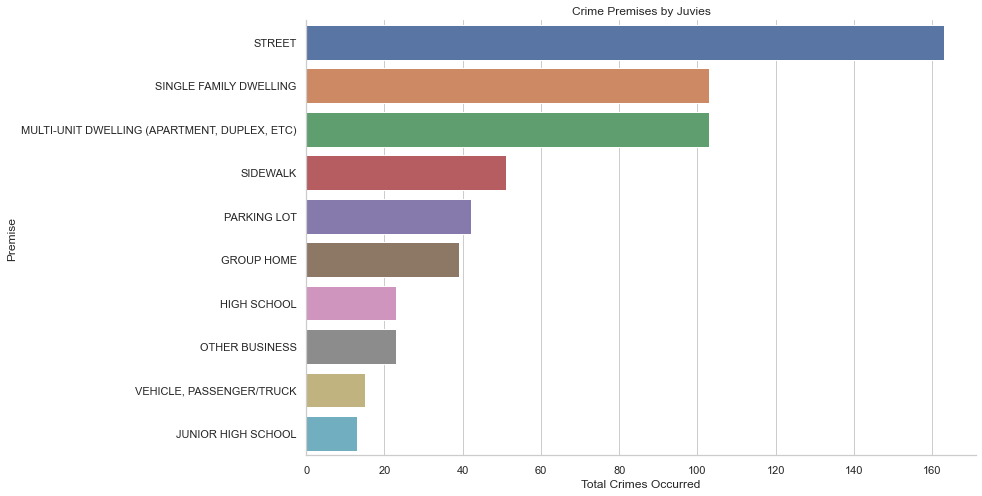

In [105]:
fig, ax = plt.subplots()
# Top 10 premises of crime by a juvie
ax = sns.barplot(y=crimejuv["Premise Description"].value_counts().head(10).index,
                 x=crimejuv["Premise Description"].value_counts().head(10))
# Axes
sns.set_style("whitegrid")
ax.set_title("Crime Premises by Juvies")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Premise")
sns.despine()

It is hard to tell if there are more kids living single family dwellings than multi-unit dwellings or kids in single family dwellings are more prone to committing a crime than the latter group.

It is just as surprising that there are equal amounts of crimes committed on the street as in a single family dwelling.

### 4.5.4. When

#### 4.5.4.1. By Day (Occured)

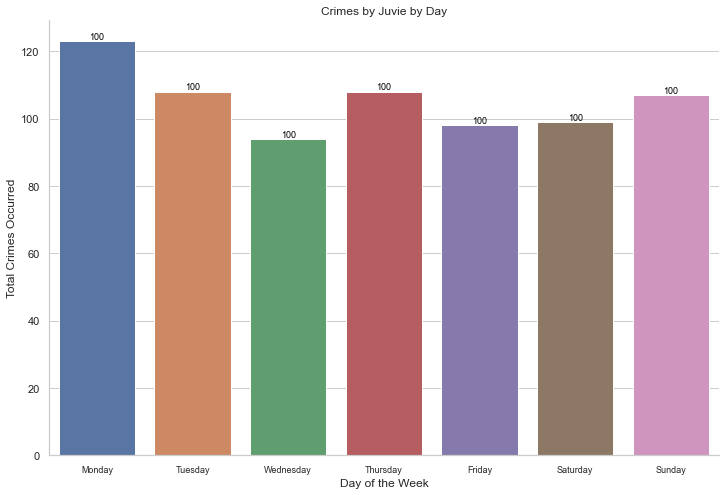

In [106]:
fig, ax = plt.subplots()
# Plotting crimes occurred by day
sns.barplot(x=crimejuv["Day Occurred"].value_counts().index, y=crimejuv["Day Occurred"].value_counts())
# Axes
ax.set_title("Crimes by Juvie by Day")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Crimes Occurred")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

It is trivial that crimes occur on weekdays since most juveniles are spending time with their family on the weekends.

#### 4.5.4.2. By Hour

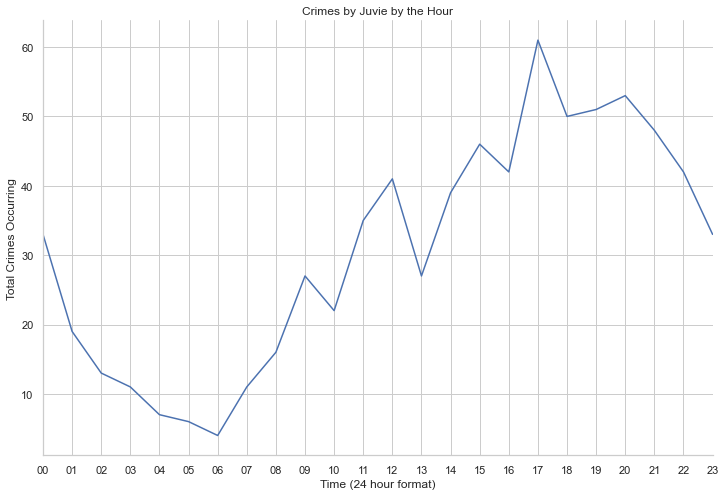

In [107]:
fig, ax = plt.subplots()
# Plotting crime through the hours
ax = plt.plot(crimejuv["Hour Occurred"].value_counts().sort_index().index, crimejuv["Hour Occurred"].value_counts().sort_index())
# Axes
plt.title("Crimes by Juvie by the Hour")
plt.xticks(range(24))
plt.xlim(0,23)
plt.xlabel("Time (24 hour format)")
plt.ylabel("Total Crimes Occurring")
sns.despine()

As we can, crimes occur throughout school lunch hours between 12pm to 4pm, with a spike at 3pm which is just after school ends.

## 4.6. Difference of most dangerous and safest neighborhood by hour

In [108]:
# Taking the max and min value of crimes occuring by Area (by equal to)
crime["Dang and Safe Area"] = crime["Area Name"][(crime["Area Name"] == "77th Street") |
                                           (crime["Area Name"] == "Hollenbeck")]

In [109]:
# Grouping by the counts
areahour = crime.groupby(["Dang and Safe Area", "Hour Occurred"]).size().reset_index(name="Count")
areahour.head(10)

,Dang and Safe Area,Hour Occurred,Count
0,77th Street,00,605
1,77th Street,01,466
2,77th Street,02,398
3,77th Street,03,347
4,77th Street,04,280
5,77th Street,05,235
6,77th Street,06,308
7,77th Street,07,408
8,77th Street,08,520
9,77th Street,09,468


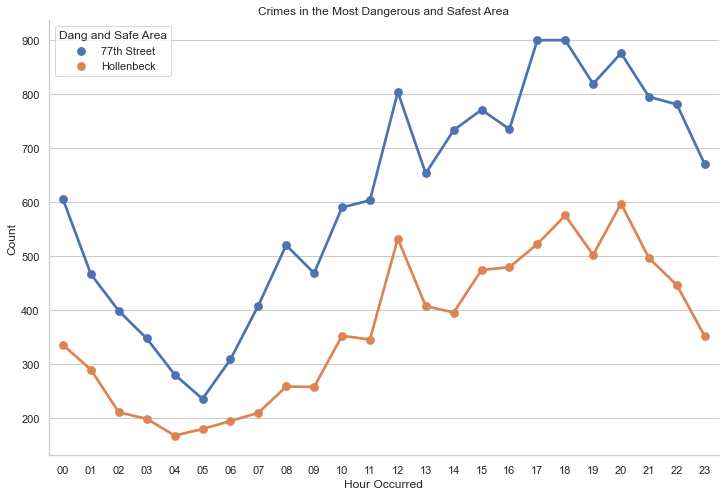

In [110]:
fig, ax = plt.subplots()
# Plotting crimes in the most dangerous and safest area by hour
sns.pointplot(x="Hour Occurred", y="Count", hue="Dang and Safe Area", data=areahour, ax=ax)
ax.set_title("Crimes in the Most Dangerous and Safest Area")
ax.set_ylabel("Count")
sns.despine()

Hollenbeck has 13150 population per square mile, and 77th Street has 14700 population per square mile.

Even though it is more population dense in 77th Street, it does not justify the nearly double crimes occurring in that area.

Of course, I could be missing the point if these crimes were committed by someone not residing in the neighborhood.

## 4.7. Looking Into What Happens at 12:00pm

So we shall delve deeper into what drives these 12pm crime surges on the graph.

### 4.7.1. Premise and Crime Type

In [111]:
# Filtering data for only 12pm (by selection)
crimenoon = crime.loc[crime["Hour Occurred"].isin(["12"])]

# Taking only top 6 crimes
top6crimes = crimenoon["Crime Code Description"].value_counts().head(6).index
crimenoon = crimenoon.loc[crimenoon["Crime Code Description"].isin(top6crimes)]

# Taking only top 6 premises
top6premises = crimenoon["Premise Description"].value_counts().head(6).index
crimenoon = crimenoon.loc[crimenoon["Premise Description"].isin(top6premises)]

In [112]:
print("The shape is {}".format(crimenoon.shape))

The shape is (4662, 40)


In [113]:
ccpremnoon = crimenoon.groupby(["Crime Code Description", "Premise Description"]).size().reset_index(name="Count")

In [114]:
ccpremnoon.head()

,Crime Code Description,Premise Description,Count
0,BATTERY - SIMPLE ASSAULT,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",152
1,BATTERY - SIMPLE ASSAULT,OTHER BUSINESS,63
2,BATTERY - SIMPLE ASSAULT,PARKING LOT,69
3,BATTERY - SIMPLE ASSAULT,SIDEWALK,141
4,BATTERY - SIMPLE ASSAULT,SINGLE FAMILY DWELLING,188


In [115]:
ccpremise = ccpremnoon.pivot("Crime Code Description", "Premise Description", "Count")

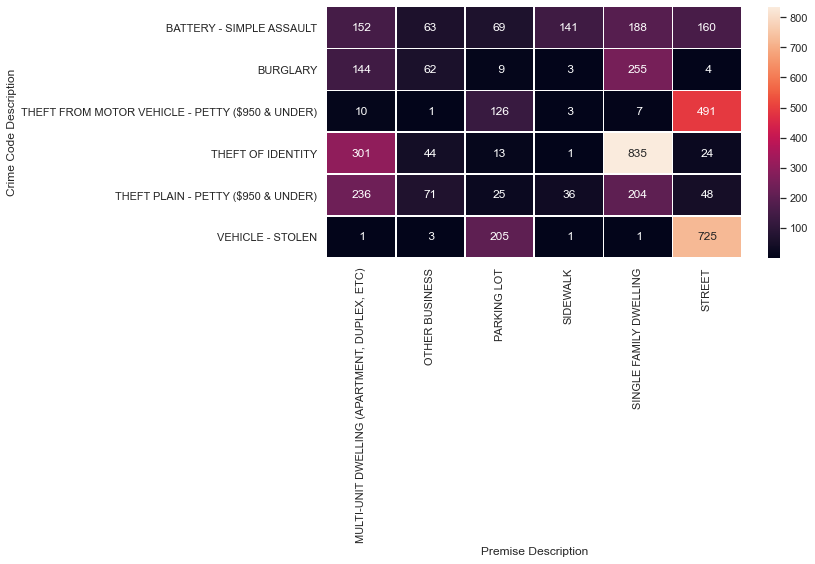

In [116]:
# Prepping data for heatmap
ccpremise = ccpremnoon.pivot("Crime Code Description", "Premise Description", "Count")

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(ccpremise, annot=True, linewidths=.5, ax=ax, fmt="2g")
fig.tight_layout()

As we can see, a total of approximately 30,000 identity theft occurs at around 12pm. An explanation for this could be that 
in a daily hacker's day, they would wake up and start to steal identities around noon.

Another explanation could be since one does not know when identity theft occurs, they just rounded and assumed it was exactly 
12pm.

I personally find the second explanation to be more plausible since it is hard to pinpoint when exactly identity theft occurs.

### 4.7.2. Removing THEFT OF IDENTITY

In [117]:
# Get list of top 6 crimes
noidentheft = list(crimenoon["Crime Code Description"].value_counts().head(6).index)

# Remove identitfy theft since it doesn't really matter with time
try:
    noidentheft.pop(noidentheft.index("THEFT OF IDENTITY"))
except:
    print("Can't find THEFT OF IDENTITY")

In [118]:
# Make new dataset without identity theft
crimenoon2 = crimenoon.loc[crimenoon["Crime Code Description"].isin(noidentheft)]

In [119]:
# Groupby crime code and premise
ccpremnoon2 = crimenoon2.groupby(["Crime Code Description", "Premise Description"]).size().reset_index(name="Count")

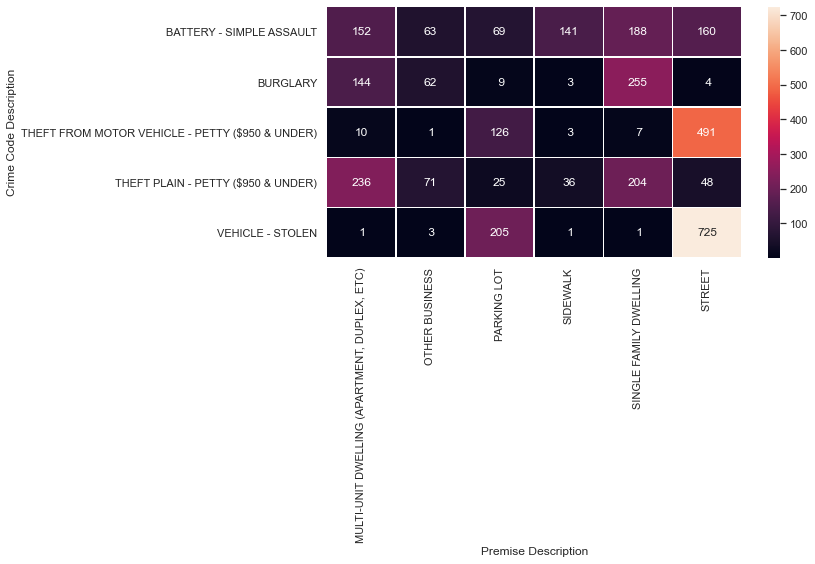

In [120]:
# Prepping data for heatmap
ccpremise2 = ccpremnoon2.pivot("Crime Code Description", "Premise Description", "Count")

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(ccpremise2, annot=True, linewidths=.5, ax=ax, fmt="2g")
fig.tight_layout()

Excluding identity theft, our second cause of noon crimes occur in single family dwelling. I shall go over through the top 5:
* Burglary in single family dwelling. This makes sense because owners aren't home which makes an easy target for burglars.
* Document forgery in single family dwelling. As with identity theft, it is hard to pinpoint when exactly a document is forged, thus attributed to 12pm.
* Grand theft and Petty theft in single family dwellings follows the same logic that there will be no owners at home.
* Burglary in multi-unit dwellings also makes sense because most of the inhabitants are out at work for the day.

## 4.8. Identity Theft Victims

In [121]:
# Filter data with only Identity Theft crimes
identheftvic = crime[crime["Crime Code Description"] == "THEFT OF IDENTITY"]

In [122]:
# Create subset with victim gender and age, then drop Na Values
identheftvic = identheftvic[["Victim Gender", "Victim Age"]]
identheftvic = identheftvic.dropna()

Text(0.5, 1.0, 'Victims of Identity Theft')

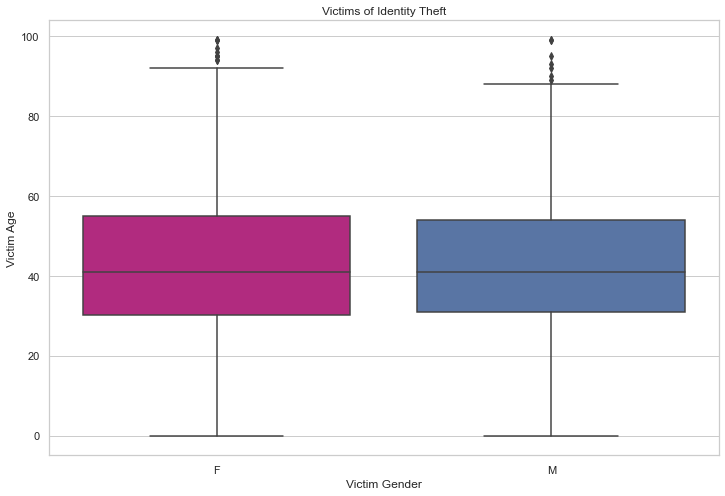

In [123]:
# Plot victims by gender and age
sns.boxplot(y="Victim Age", x="Victim Gender", data=identheftvic, palette={"M": "b", "F": "mediumvioletred"})
# Axes
plt.title("Victims of Identity Theft")

It is amazing how perfectly equal the distribution for victims of identity theft are, regarding their gender and age.

## 4.9. Crimes by Month, Excluding 2020

In [124]:
# Filtering 2020 out of the dataframe
crimeno17 = crime.loc[crime["Year Occurred"].isin(range(2020, 2021))]

In [125]:
# Making a new dataframe
df4 = pd.DataFrame({
    'Month': list(crimeno17["Month Reported"].value_counts().index),
    'Crime Reported': list(crimeno17["Month Reported"].value_counts()),
    'Crime Occurred': list(crimeno17["Month Occurred"].value_counts())
})
monrepoccclean = df4.set_index("Month").stack().reset_index().rename(columns={"level_1" : "Variable", 0 : "Crime"})

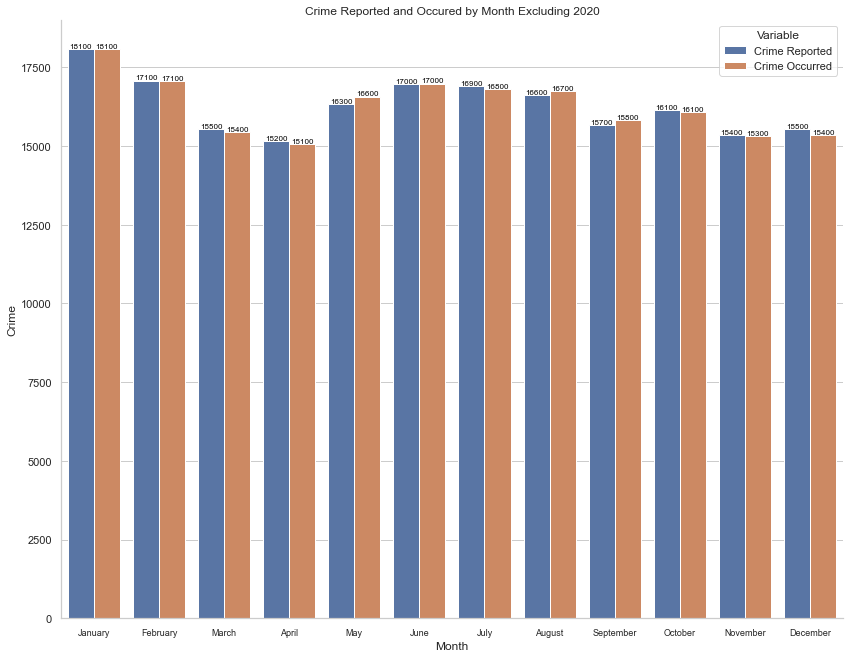

In [126]:
fig, ax = plt.subplots(figsize=(14,11))
# Plotting side by side crime rep and occ by day
sns.barplot(x = "Month", y = "Crime", hue = "Variable", data=monrepoccclean, ax=ax)
# Axes
ax.set_title("Crime Reported and Occured by Month Excluding 2020")
ax.set_xticklabels(["January", "February", "March", "April", "May", "June",
                    "July", "August", "September", "October", "November", "December"], fontsize=9)
ax.set_ylabel("Crime")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=8, color='black', ha='center', va='bottom')
sns.despine(fig)

Excluding the missing data from Sept 2020 to Dec 2021, the monthly distribution of Crimes reported and occurring are equal, with months having 31 days generally having more than the ones with 30 days and 28 days.

# Probability/ Cumulative Distribution Function (CDF)

In [ ]:
# Load crime_v2.csv into a pandas dataFrame.
crimeData = pd.read_csv("crime_v2.csv")
    

# (Q) how many data-points and features?
print(crimeData.shape)


# See the input data.
crimeData.head(5)
# Identified the columns have header information.

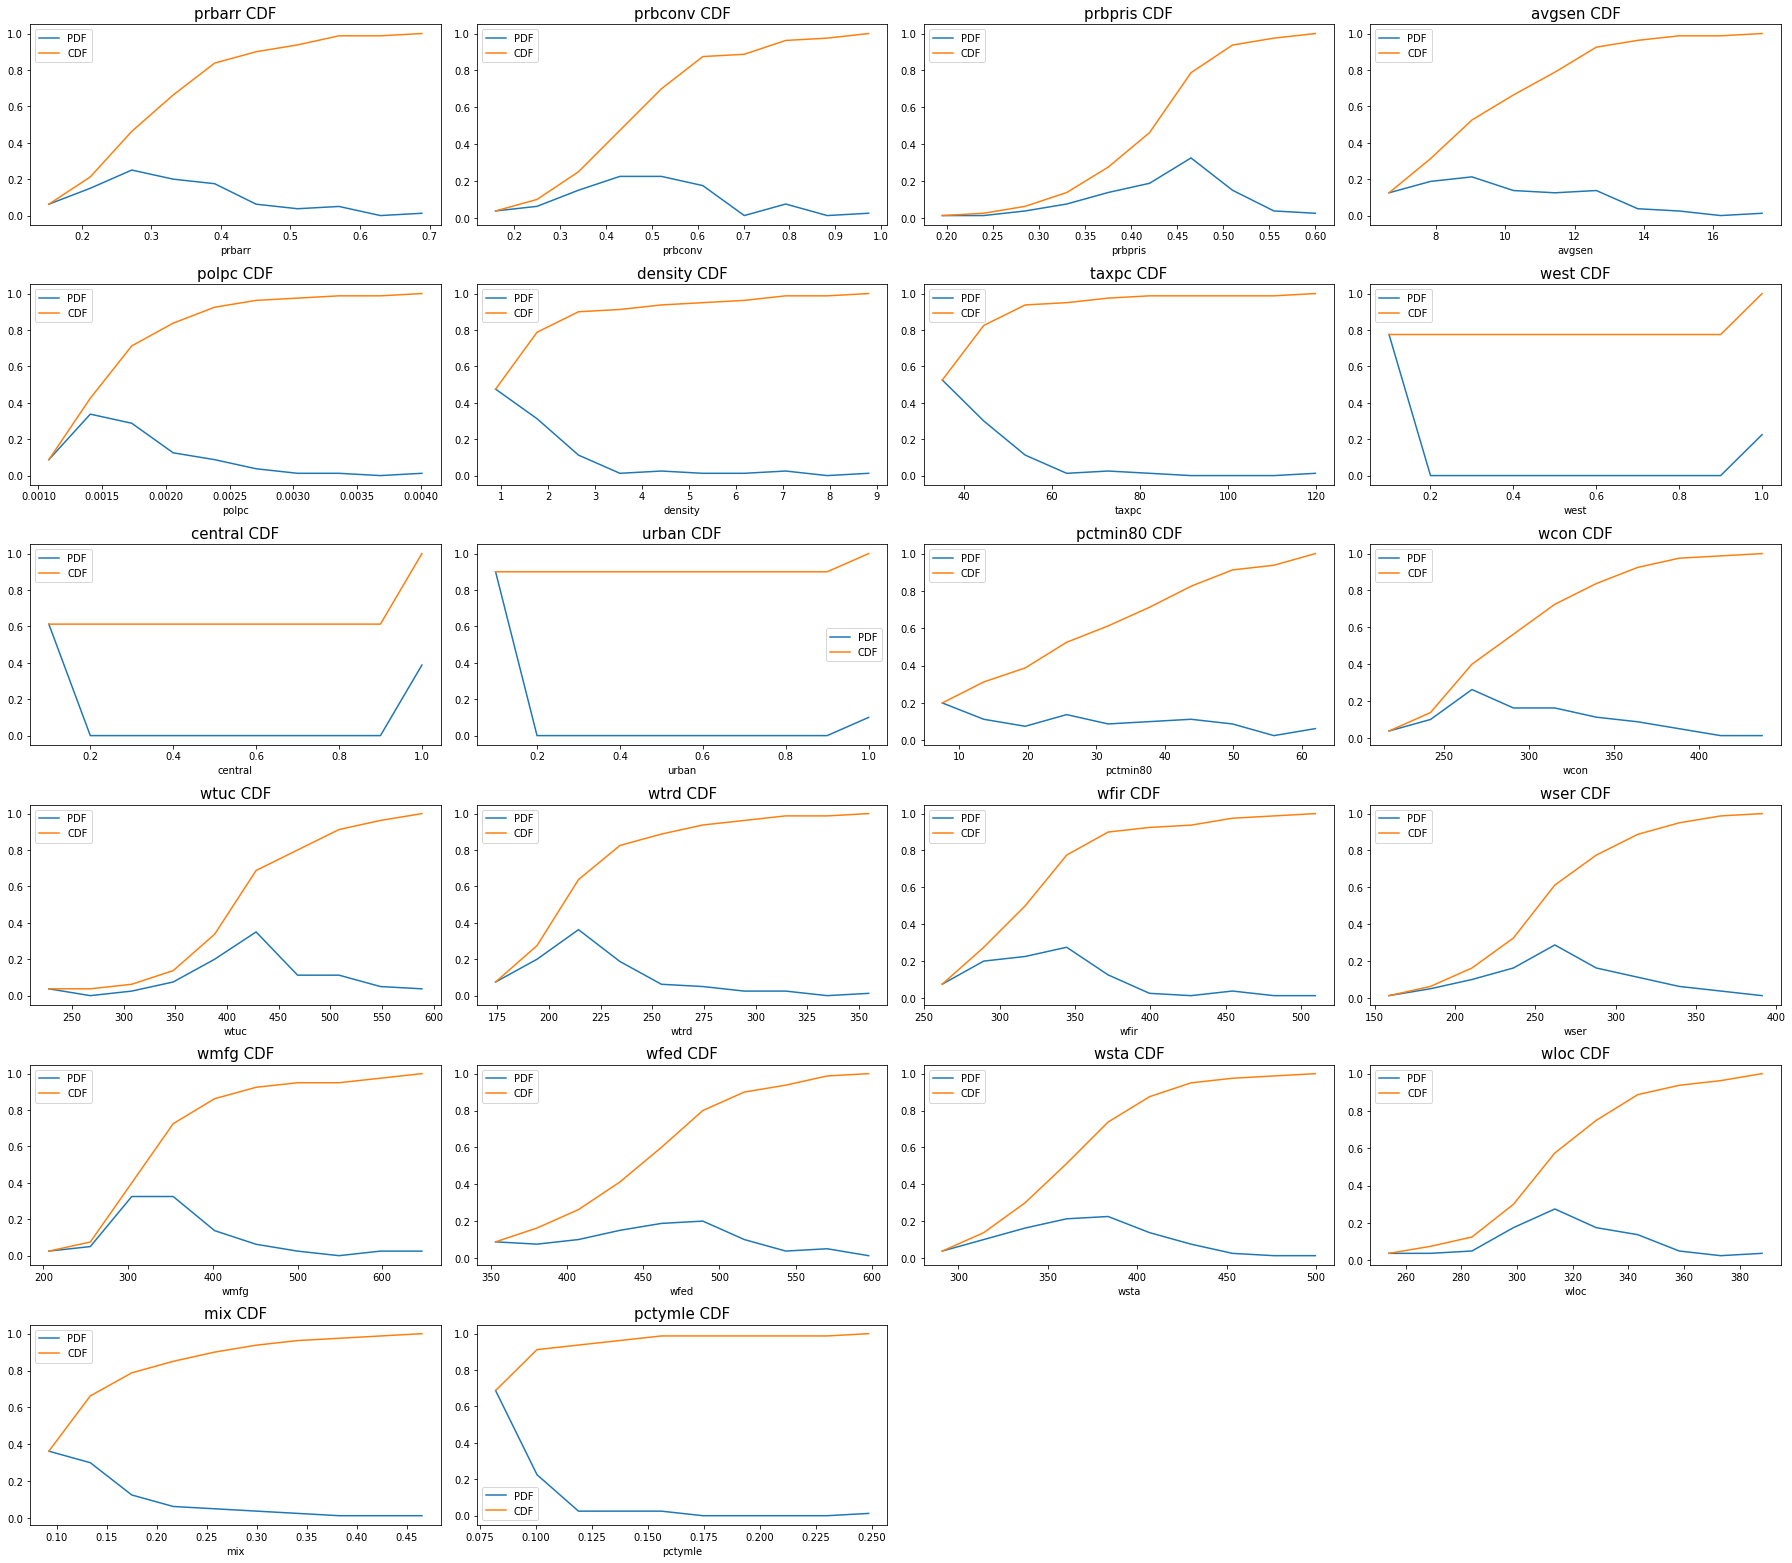

In [23]:
plt.figure(figsize=(25,25))

for idx, col in enumerate(crimeData.columns[2:]): #excluding county & year
    counts, bin_edges = np.histogram(crimeData[col], bins=10, density = True)
    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)
    
    plt.subplot(7, 4, idx+1)
    plt.plot(bin_edges[1:],pdf, label='PDF')
    plt.plot(bin_edges[1:],cdf, label='CDF')
    plt.title(col + " CDF",fontsize=15)
    plt.xlabel(col)
#     plt.ylabel('Probability')
    plt.tight_layout()

    plt.legend()

**Observations:**

a) Based on the above pairplot, it can be noted that **density is most positively correlated with crime rate. There is also some correlation with weekly wages under different domains but it needs further investigation, as they are not so pronounced.**

b) Strangely, the **weekly wage features and crime rate is found to be slightly positively correlated. This signifies unequal distribution of income** or probably high unemployment rate. One of the most important features that is not in the given data may be unemployment rate.

Lets try to find if there is any correlation among features for each location: 'west', 'central' & 'urban'.

Number of data points in category: west is 18
Number of data points in category: central is 31
Number of data points in category: urban is 8


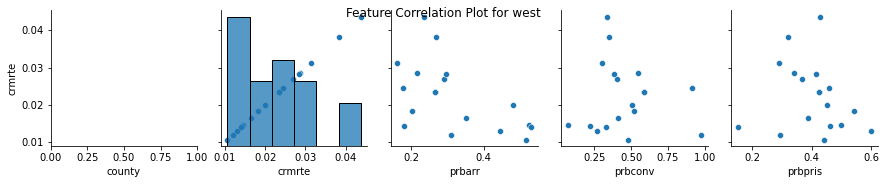

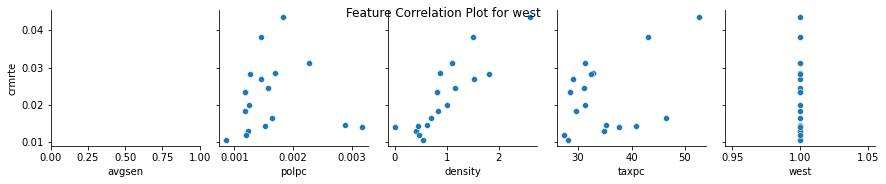

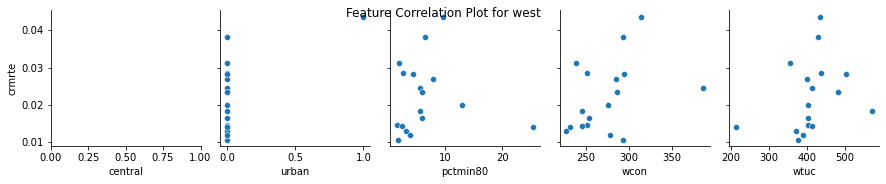

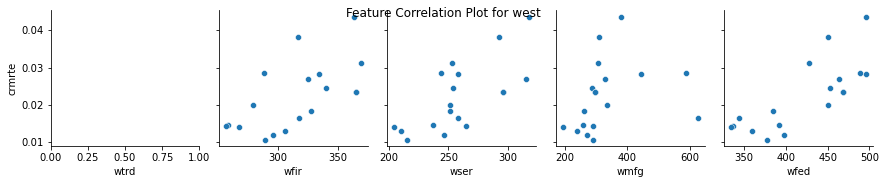

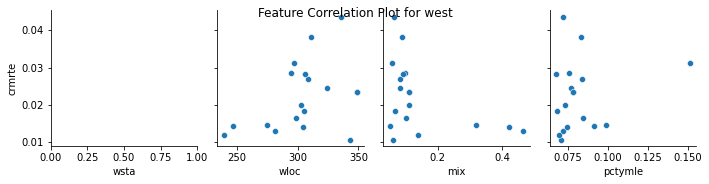

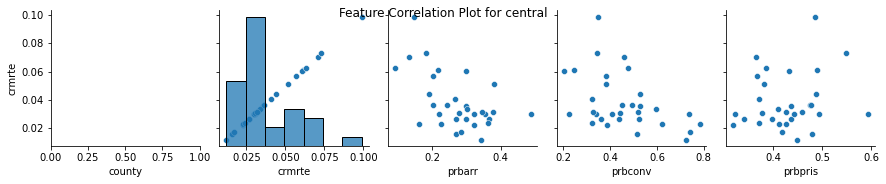

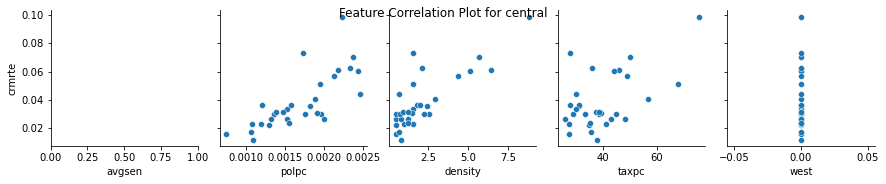

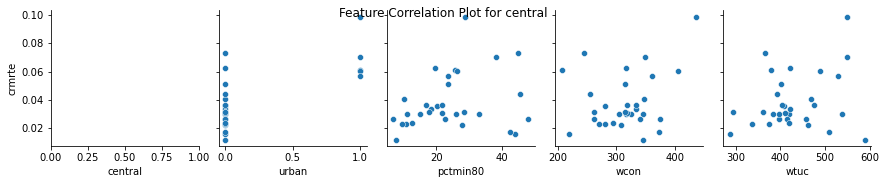

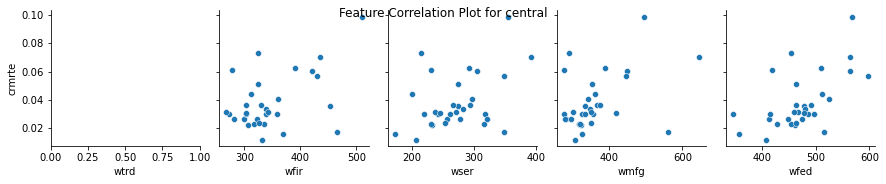

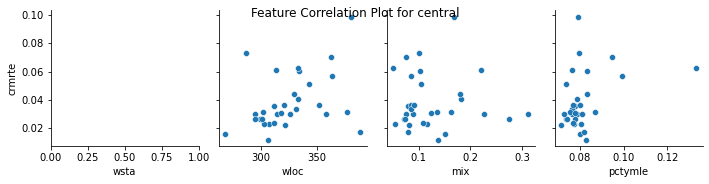

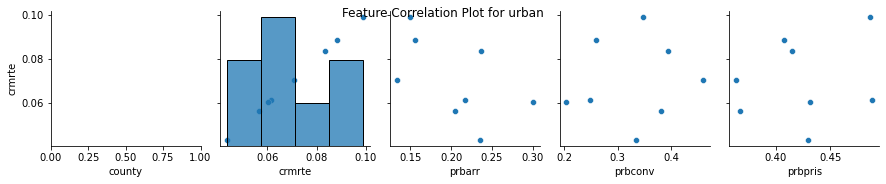

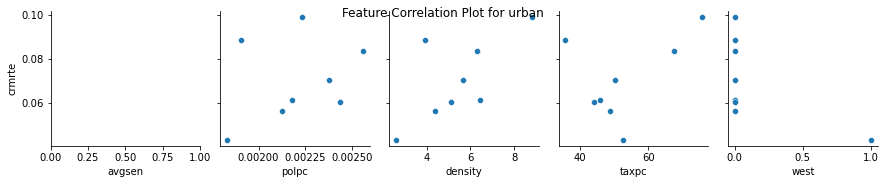

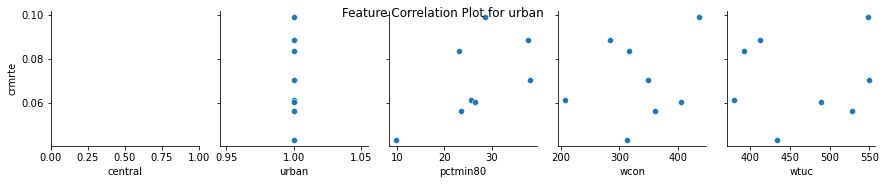

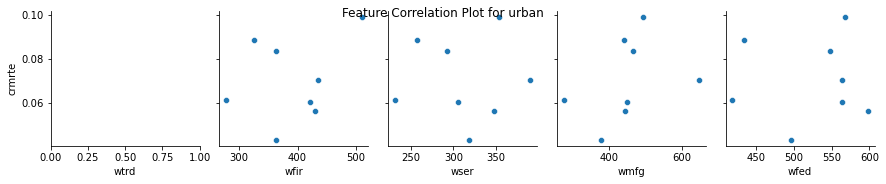

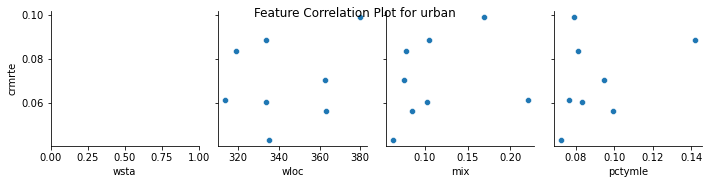

In [25]:
# To plot the correlation of boolean features against crime rate

# Categories: west, central and urban
categories = ['west', 'central', 'urban']

for category in categories:
    
    categoricalCrime = crimeData[crimeData[category] == 1]
    print('Number of data points in category: ' + 
                          category + ' is '+ str(len(categoricalCrime)))

    for i in range(0, len(categoricalCrime.columns), 5):
        
        sns.pairplot(data=categoricalCrime,
                    x_vars=categoricalCrime.columns[i:i+5],
                    y_vars=['crmrte'])
#          plt.title('Feature Correlation Plot for ' + category, loc = 'left')
        plt.suptitle('Feature Correlation Plot for ' + category)


**Observations:**

1) Some of the correlation lines are showing upward or downward trends more than before. 

2) **Probability of conviction is found to have negative correlation with crime rate in both west and central, but not in urban areas.**

3) **Tax Per capita is found to have positive correlation with crime rate in both central and urban areas.**

4) **Percentage of minority is positively correlated with crime rate, both in west and in urban areas.**

5) Thus, a combination of density and location (urban/ west/ central) might help aid crime rate prediction.

6) However, there seems to be **not much data for 'urban areas'** to arrive at a conclusion.

## Linear Regression Fit of Strongly Correlated Features

We have a lot of features to analyse in the input dataset. So let's take the strongly correlated quantitative features from this dataset and analyse them one by one.

In [24]:
# To find out strongly correlated values with crime rate. 
# 40% is taken as the threshold beyond which we include the feature in model. 

crimeData_corr = crimeData.corr()['crmrte']
selected_features_list = crimeData_corr[
                abs(crimeData_corr) > 0.4].sort_values(ascending=False)
print("There are {} strongly correlated values with Crime Rate:\n{}".format(
                len(selected_features_list), selected_features_list))

print(list(selected_features_list.index))

There are 8 strongly correlated values with Crime Rate:
crmrte     1.000000
density    0.722499
urban      0.629518
polpc      0.558493
taxpc      0.490368
wfed       0.466530
wloc       0.409632
prbarr    -0.503868
Name: crmrte, dtype: float64
['crmrte', 'density', 'urban', 'polpc', 'taxpc', 'wfed', 'wloc', 'prbarr']


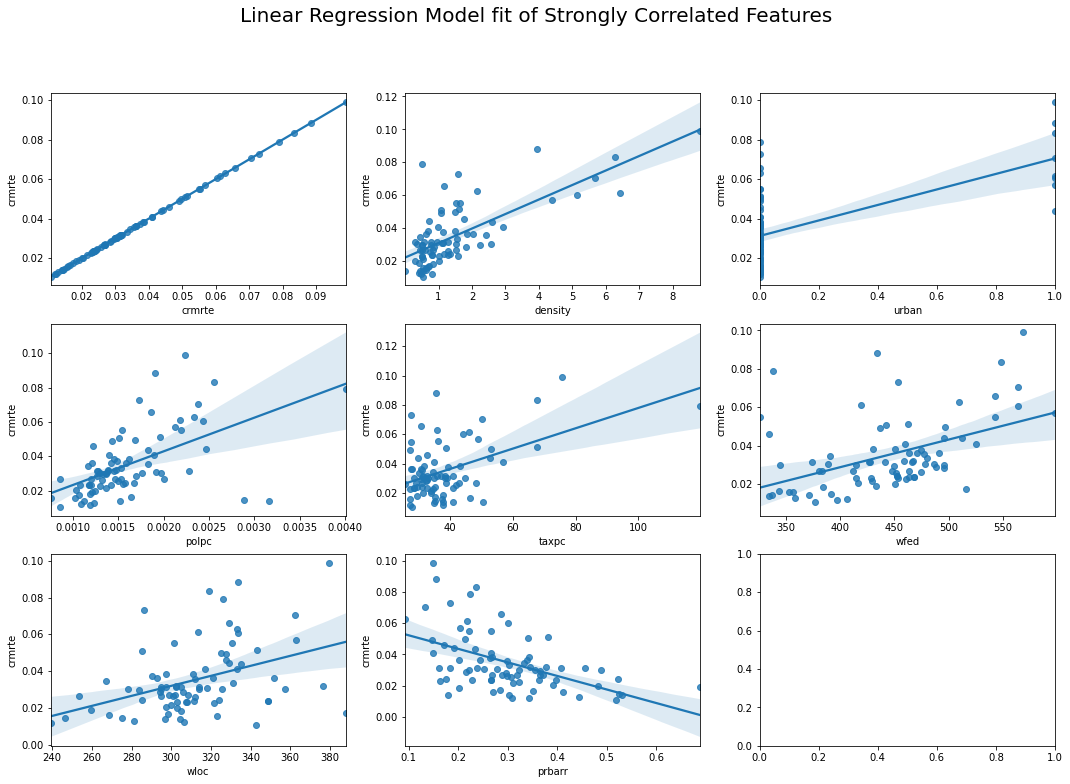

In [26]:
# To plot data and a linear regression model fit.

fig, ax = plt.subplots(round(len(selected_features_list) / 3), 3, figsize = (18, 12))

features = list(selected_features_list.index)
plt.suptitle('Linear Regression Model fit of Strongly Correlated Features', 
                                                                     fontsize=20)

for i, ax in enumerate(fig.axes):
    if i < len(features):
        sns.regplot(x=features[i],y='crmrte', 
                        data=crimeData[features], ax=ax)

# Linear Model on Los Anageles Crime Rate Dataset

(91, 25)


,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
0,1,20,0.035604,0.298270,0.527596,0.436170,6.71,0.001828,2.422633,30.993681,...,408.724487,221.270065,453.172211,274.177460,334.540008,477.579987,292.089996,311.910004,0.080169,0.077871
1,3,20,0.015253,0.132029,1.481480,0.450000,6.35,0.000746,1.046332,26.892078,...,376.254181,196.010101,258.564972,192.307693,300.380005,409.829987,362.959992,301.470001,0.030227,0.082607
2,5,20,0.012960,0.444444,0.267857,0.600000,6.76,0.001234,0.412766,34.816051,...,372.208435,229.320892,305.944061,209.697220,237.649994,358.980011,331.529999,281.369995,0.465116,0.072115
3,7,20,0.026753,0.364760,0.525424,0.435484,7.14,0.001530,0.491557,42.947586,...,397.690125,191.172012,281.065094,256.721435,281.799988,412.149994,328.269989,299.029999,0.273622,0.073537
4,9,20,0.010623,0.518219,0.476563,0.442623,8.22,0.000860,0.546948,28.054739,...,377.312561,206.821487,289.312469,215.193329,290.890015,377.350006,367.230011,342.820007,0.060086,0.070698


# Data Cleaning

In [12]:
# Data Cleaning based on EDA 
# Last row with special character fixed in input data.

# Removing the wage outlier row based on observation from EDA
crimeData = crimeData[crimeData.county != 185] # very high wser & prob of conviction
crimeData = crimeData[crimeData.county != 115] # prob of arrest > 1

# Removing rows with probability of arrest and conviction > 1
crimeData = crimeData[crimeData['prbarr'] < 1]
crimeData = crimeData[crimeData['prbconv'] < 1]

# The location cannot be both west and central together.
crimeData = crimeData[crimeData['west']+crimeData['central'] <= 1]

# dropping the Year column as it doesnt help in prediction
crimeData = crimeData.drop('year', axis=1)

# (Q) how many after deletion?
print (crimeData.shape)

(80, 24)


# Evaluate Observations using Linear Regression Model

Lets evaluate the above observations by building Linear Regression Models, as it helps to understand the relation between variables better.

## Creating Model with Most Correlated Feature

In [14]:
import statsmodels.api as sm

y = crimeData['crmrte']
# X = crimeData.drop('crmrte', axis=1)
X = crimeData['density']

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()
# predictions = model.predict(X) # make the predictions by the model

density_pvalue = model.pvalues['density']

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     85.18
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           3.88e-14
Time:                        13:49:09   Log-Likelihood:                 234.23
No. Observations:                  80   AIC:                            -464.5
Df Residuals:                      78   BIC:                            -459.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0222      0.002     10.949      0.000       0.018       0.026
density        0.0088      0.001      9.229      0.000       0.007       0.011
==============================================================================
Omnibus:                       31.606   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.597
Skew:                           1.517   Prob(JB):                     3.11e-13
Kurtosis:                       5.841   Cond. No.                         3.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interim Observations:**

a) As the p-value of density is 0 (small), the changes in crime rate has got close relation with changes in density.

b) R-squared value is found to be 0.525 with only density as predictor variable. This means that 52.5% variability of crime rate is explained by density feature.

c) Co-effient estimate of 0.0086 indicates one value increase of density would cause 0.0086 value increase in crime rate.

In [15]:
y = crimeData['crmrte']
# X = crimeData.drop('crmrte', axis=1)
# X = crimeData[('density', 'urban')]
X = crimeData[['density', 'urban']]

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

density_pvalue_upd = model.pvalues['density']
print('Difference in P-Value = ' + str(density_pvalue_upd - density_pvalue))

# Print out the statistics
model.summary()

Difference in P-Value = 2.2791391426354206e-05


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     42.12
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           4.38e-13
Time:                        13:50:04   Log-Likelihood:                 234.27
No. Observations:                  80   AIC:                            -462.5
Df Residuals:                      77   BIC:                            -455.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0226      0.002      9.170      0.000       0.018       0.027
density        0.0084      0.002      4.511      0.000       0.005       0.012
urban          0.0026      0.010      0.277      0.783      -0.016       0.022
==============================================================================
Omnibus:                       31.413   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.769
Skew:                           1.514   Prob(JB):                     4.71e-13
Kurtosis:                       5.804   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interim Observations:**

a) **R-squared value is found to be slightly higher (0.527)** when the variable, 'urban' is coupled with density as predictor variables. But, R Squared always goes up when you add more variables regardless of whether the added variable help in prediction or not.

b)  Adjusted R Squared, penalizes for adding more variables. Thus, it can go down when you add variables that don’t contribute. Here note that, **Adjusted R-squared value has gone down from 0.519 to 0.514. Also, the AIC value is increased from -470 to -469** (the smaller the AIC value, the better the model is).

c) It has been noticed that the **p-value of 'density' feature has been increased slightly.** 

Thus, **the model has become more less reliable to explain crime rate**, because the feature 'urban' doesnt contribute to prediction. The confusion about the correlation between 'urban' and 'density' variable during EDA step, has been sorted out.

**Note:** If we add variables that are not meaningful as predictor, then it **would cause 'Overfitting'.** Then, prediction model would perform great with the training data but not with the real world data.

# Multiple Linear Regression

## Model with all Features

In [17]:
y = crimeData['crmrte']
X = crimeData.drop('crmrte', axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()
# density_pvalue = model.pvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     20.94
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           9.21e-20
Time:                        13:50:50   Log-Likelihood:                 295.18
No. Observations:                  80   AIC:                            -542.4
Df Residuals:                      56   BIC:                            -485.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0120      0.018      0.660      0.512      -0.024       0.048
county      2.584e-06   1.54e-05      0.168      0.867   -2.82e-05    3.33e-05
prbarr        -0.0522      0.010     -5.093      0.000      -0.073      -0.032
prbconv       -0.0073      0.006     -1.179      0.243      -0.020       0.005
prbpris        0.0110      0.012      0.890      0.377      -0.014       0.036
avgsen        -0.0008      0.000     -2.005      0.050      -0.002   -6.38e-07
polpc         10.7921      2.617      4.123      0.000       5.549      16.036
density        0.0049      0.001      3.523      0.001       0.002       0.008
taxpc          0.0002      0.000      1.918      0.060   -8.89e-06       0.000
west          -0.0051      0.004     -1.205      0.233      -0.014       0.003
central       -0.0063      0.003     -2.320      0.024      -0.012      -0.001
urban          0.0035      0.006      0.558      0.579      -0.009       0.016
pctmin80       0.0003   9.37e-05      2.877      0.006    8.19e-05       0.000
wcon        3.108e-05   2.67e-05      1.164      0.249   -2.24e-05    8.46e-05
wtuc        1.281e-05   1.52e-05      0.842      0.403   -1.77e-05    4.33e-05
wtrd        5.237e-05    4.2e-05      1.248      0.217   -3.17e-05       0.000
wfir       -4.966e-05    2.8e-05     -1.774      0.081      -0.000    6.41e-06
wser       -8.336e-05   3.05e-05     -2.729      0.008      -0.000   -2.22e-05
wmfg       -2.522e-06   1.35e-05     -0.186      0.853   -2.96e-05    2.46e-05
wfed        3.817e-05    2.5e-05      1.527      0.132   -1.19e-05    8.82e-05
wsta       -5.022e-05   2.42e-05     -2.074      0.043   -9.87e-05   -1.71e-06
wloc        4.453e-05   4.51e-05      0.987      0.328   -4.58e-05       0.000
mix           -0.0228      0.014     -1.632      0.108      -0.051       0.005
pctymle        0.1447      0.044      3.261      0.002       0.056       0.234
==============================================================================
Omnibus:                        6.753   Durbin-Watson:                   2.494
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.098
Skew:                           0.639   Prob(JB):                       0.0474
Kurtosis:                       3.443   Cond. No.                     3.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
y = crimeData['crmrte']

# Feature 'urban' is found to be worsen the model as per above analysis.
# Intuitively county shouldnt contribute prediction and also p value is high.
X = crimeData.drop(['crmrte', 'urban', 'county'], axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     23.60
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           4.53e-21
Time:                        13:51:04   Log-Likelihood:                 294.95
No. Observations:                  80   AIC:                            -545.9
Df Residuals:                      58   BIC:                            -493.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0099      0.017      0.568      0.572      -0.025       0.045
prbarr        -0.0524      0.010     -5.197      0.000      -0.073      -0.032
prbconv       -0.0076      0.006     -1.240      0.220      -0.020       0.005
prbpris        0.0104      0.012      0.862      0.392      -0.014       0.035
avgsen        -0.0008      0.000     -2.011      0.049      -0.002   -3.73e-06
polpc         10.6581      2.557      4.168      0.000       5.540      15.776
density        0.0055      0.001      6.517      0.000       0.004       0.007
taxpc          0.0002      0.000      2.012      0.049     1.1e-06       0.000
west          -0.0045      0.004     -1.108      0.272      -0.013       0.004
central       -0.0062      0.003     -2.343      0.023      -0.012      -0.001
pctmin80       0.0003   8.82e-05      3.231      0.002       0.000       0.000
wcon         3.12e-05   2.63e-05      1.186      0.240   -2.15e-05    8.39e-05
wtuc        1.339e-05   1.45e-05      0.924      0.359   -1.56e-05    4.24e-05
wtrd        5.361e-05    4.1e-05      1.308      0.196   -2.84e-05       0.000
wfir       -5.175e-05   2.73e-05     -1.899      0.063      -0.000    2.81e-06
wser       -8.318e-05   2.96e-05     -2.809      0.007      -0.000   -2.39e-05
wmfg       -1.573e-06   1.32e-05     -0.119      0.906    -2.8e-05    2.49e-05
wfed        3.676e-05   2.45e-05      1.500      0.139   -1.23e-05    8.58e-05
wsta       -4.646e-05   2.28e-05     -2.034      0.047   -9.22e-05   -7.44e-07
wloc        4.501e-05   4.44e-05      1.014      0.315   -4.39e-05       0.000
mix           -0.0223      0.014     -1.628      0.109      -0.050       0.005
pctymle        0.1439      0.043      3.330      0.002       0.057       0.230
==============================================================================
Omnibus:                        6.849   Durbin-Watson:                   2.503
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.210
Skew:                           0.646   Prob(JB):                       0.0448
Kurtosis:                       3.438   Cond. No.                     3.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Removing features from all-feature Model

**Interim Observations:**

a) **Adj. R-squared improved** from 0.825 in all-feature model to 0.830, after removal of 2 features 'urban', 'county'.

b) **AIC value decreased** from -591.3 in all-feature model to -595.2, after removal of 2 features 'urban', 'county'.

Thus, **we have a better model than the all-feature model.** We will try to remove more features and analyze the model indicators.

In [21]:
y = crimeData['crmrte']
# Features are dropped based on p-value, R-Squared and AIC figures.
X = crimeData.drop(['crmrte', 'urban', 'county', 
                    'wmfg', 'prbpris', 'wloc', 'west', 'wtuc'], axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     30.98
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           8.65e-24
Time:                        13:51:56   Log-Likelihood:                 292.00
No. Observations:                  80   AIC:                            -550.0
Df Residuals:                      63   BIC:                            -509.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0213      0.015      1.444      0.154      -0.008       0.051
prbarr        -0.0567      0.010     -5.893      0.000      -0.076      -0.037
prbconv       -0.0090      0.006     -1.501      0.138      -0.021       0.003
avgsen        -0.0007      0.000     -1.912      0.060      -0.001    3.15e-05
polpc          9.7105      2.378      4.083      0.000       4.958      14.463
density        0.0055      0.001      6.629      0.000       0.004       0.007
taxpc          0.0002   9.28e-05      2.657      0.010    6.11e-05       0.000
central       -0.0039      0.002     -2.058      0.044      -0.008      -0.000
pctmin80       0.0004   5.56e-05      6.573      0.000       0.000       0.000
wcon        4.224e-05   2.36e-05      1.786      0.079   -5.01e-06    8.95e-05
wtrd        6.553e-05   3.84e-05      1.705      0.093   -1.13e-05       0.000
wfir       -5.353e-05   2.64e-05     -2.028      0.047      -0.000   -7.86e-07
wser       -7.792e-05   2.82e-05     -2.768      0.007      -0.000   -2.17e-05
wfed        4.205e-05   2.35e-05      1.789      0.078   -4.91e-06     8.9e-05
wsta       -4.664e-05   2.18e-05     -2.136      0.037   -9.03e-05   -3.01e-06
mix           -0.0224      0.013     -1.697      0.095      -0.049       0.004
pctymle        0.1471      0.041      3.583      0.001       0.065       0.229
==============================================================================
Omnibus:                        3.198   Durbin-Watson:                   2.571
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.731
Skew:                           0.450   Prob(JB):                        0.255
Kurtosis:                       3.089   Cond. No.                     2.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interim Observations:**

a) **Adj. R-squared of the above model with 8 features dropped is better** than the all-feature model.

b) **AIC value of the above model is better** than the all-feature model.

**Thus, we have a better model than the all-feature model** by removing more features such as 'wmfg', 'prbpris', 'wloc', 'west', 'wtuc'. We will try to remove even more features with p > 0.05 and evaluate using RMSE. 

We will test the change in RMSE value when the features with p > 0.05 are removed. The features with p > 0.05 are prbconv, mix, wfed, wtrd, wcon & avgsen. We will also check the RMSE values for the features removed in the previous model.

# OLS Regression Characteristic of Final Model

In [22]:
y = crimeData['crmrte']
# Features are dropped based on p-value, R-Squared and AIC figures.
X = crimeData.drop(['crmrte', 'urban', 'county', 
                    'wmfg', 'prbpris', 'wloc', 
                    'west', 'wtuc', 'wtrd'], axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     31.90
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           5.95e-24
Time:                        13:53:01   Log-Likelihood:                 290.20
No. Observations:                  80   AIC:                            -548.4
Df Residuals:                      64   BIC:                            -510.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0273      0.015      1.875      0.065      -0.002       0.056
prbarr        -0.0565      0.010     -5.786      0.000      -0.076      -0.037
prbconv       -0.0113      0.006     -1.909      0.061      -0.023       0.001
avgsen        -0.0007      0.000     -1.773      0.081      -0.001     8.3e-05
polpc          8.7668      2.347      3.735      0.000       4.078      13.455
density        0.0057      0.001      6.946      0.000       0.004       0.007
taxpc          0.0003   9.39e-05      2.735      0.008    6.93e-05       0.000
central       -0.0037      0.002     -1.896      0.062      -0.008       0.000
pctmin80       0.0004   5.63e-05      6.381      0.000       0.000       0.000
wcon        4.943e-05   2.36e-05      2.094      0.040    2.27e-06    9.66e-05
wfir       -3.692e-05   2.49e-05     -1.483      0.143   -8.67e-05    1.28e-05
wser       -7.727e-05   2.86e-05     -2.705      0.009      -0.000   -2.02e-05
wfed        5.208e-05   2.31e-05      2.256      0.028    5.96e-06    9.82e-05
wsta       -5.317e-05   2.18e-05     -2.438      0.018   -9.67e-05    -9.6e-06
mix           -0.0207      0.013     -1.550      0.126      -0.047       0.006
pctymle        0.1404      0.041      3.386      0.001       0.058       0.223
==============================================================================
Omnibus:                        7.285   Durbin-Watson:                   2.498
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.695
Skew:                           0.608   Prob(JB):                       0.0352
Kurtosis:                       3.727   Cond. No.                     2.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""